In [1]:
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#LDP Data Analysis of tweets
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import consumer_key, consumer_secret, access_token, access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_toke`n_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

import spacy
from spacy import displacy
# Load the spaCy model
nlp = spacy.load('en_core_web_sm') #sm does not use vectors
                                   #but md does use vectors

In [2]:
# Target User
#https://twitter.com/CCLdotORG
target_user = "CCLdotORG"

# Array of Tweets
CCLdotORG_tweets = {}

# Tweet Texts
tweet_texts = []

# A list to hold tweet timestamps
tweet_times = []

# Create a loop to iteratively run API requests
for x in range(1, 51):

    # Get all tweets from home feed (for each page specified)
    public_tweets = api.user_timeline(target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:

        # Print Tweet
        print(tweet["text"])

        # Store Tweet in Array
        tweet_texts.append(tweet["text"])
        
        # Store Tweet time in Array
        raw_time = tweet["created_at"]
        print(raw_time)
        tweet_times.append(raw_time)

RT @GAAnysz: Visible learning is a great addition to our work in developing Citizen Leaders  thanks @TommyHThompson @CorwinPress and @CCLdo…
Mon Aug 20 16:42:04 +0000 2018
RT @DivagirlV11: 1st day of school.
Eager &amp; excited for this week's Leading for Organizational Impact. With @CCLdotORG 
Grateful that my or…
Mon Aug 20 13:36:25 +0000 2018
Why does your performance lag when your #business #strategy is great? https://t.co/dySgNcm5gp https://t.co/uRLHsGildz
Mon Aug 20 13:24:10 +0000 2018
Is your organization missing out on the benefits of the gig economy? Learn more by joining our #webinar this Thursd… https://t.co/7D9zu1gRFw
Mon Aug 20 10:11:05 +0000 2018
Which stage of #innovation do you prefer? https://t.co/FZWsinXv2V #FutureFluency
Mon Aug 20 07:10:07 +0000 2018
Do you know how to communicate effectively at work? https://t.co/ow2Cy6LHXR #communication #leadership #management https://t.co/6jFzLoL9D8
Mon Aug 20 04:59:08 +0000 2018
Here's how you can deal with problem employees wh

#Coaching may be the key to improving #performance in your organization. https://t.co/oFxZyaJ3vd #leadership… https://t.co/wUJHtez6RI
Thu Aug 02 10:06:08 +0000 2018
Why (and how) to confront problem employees: https://t.co/hbPNlztq1q #management https://t.co/ul8OyYTloO
Thu Aug 02 07:45:05 +0000 2018
#Networking doesn't have to feel awkward or unnatural. Follow these 6 rules for a more pleasant and effective exper… https://t.co/Wtg3nxBx81
Thu Aug 02 04:38:07 +0000 2018
5 steps for tackling tough conversations at work: https://t.co/5E9qMrTPaY #communication #leadership #development… https://t.co/lTlKoDXumE
Thu Aug 02 01:30:05 +0000 2018
Talent management looks totally different in the gig economy. Our upcoming #webinar can help you adapt:… https://t.co/gSaqII3CNy
Wed Aug 01 10:15:05 +0000 2018
Can you identify your organization's #leadership culture? https://t.co/7Hc0FRHEcq #culture #management #strategy https://t.co/fCz0eNdh4s
Wed Aug 01 07:50:05 +0000 2018
Problem employees aren't just

Managers — could you be doing more to develop and retain talent? https://t.co/OaxMHCg2gz #management #talent… https://t.co/J65uXCd3am
Thu Jul 12 10:15:05 +0000 2018
Everyone needs to be able to #influence others at work, especially new managers and individual contributors:… https://t.co/AE0MiizZvv
Thu Jul 12 07:50:09 +0000 2018
Do you have what it takes to climb to the top? https://t.co/zBIK7ZGxjz #leadership #executive #management #business https://t.co/NOA26gfKwF
Thu Jul 12 04:15:08 +0000 2018
This is the key to immediately improve your talent #development process: https://t.co/aulhOOwho6 #leadership… https://t.co/jg0S4cb0XH
Thu Jul 12 01:50:05 +0000 2018
5 ways dealing with a toxic boss hurts your wellbeing — and how to fight back: https://t.co/hEbsnfGMsE (via @CNBC)… https://t.co/LtiMXrsAP8
Wed Jul 11 22:40:05 +0000 2018
RT @candacetucker1: Love this blog post by one of our interns from the Opportunity GSO Fellows Program about her experience at @CCLdotORG !…
Wed Jul 11 15:45:29 +0

Mon Jun 25 04:10:08 +0000 2018
Without a clear #leadership brand, you might be overlooked and undervalued by your boss or colleagues.… https://t.co/Ra3Q3n38iY
Sun Jun 24 22:07:08 +0000 2018
Retain your high-potential #talent with these 3 steps: https://t.co/7d0SIEGVXB #HR #leadership #management https://t.co/0uRB8rWwQk
Sun Jun 24 16:40:08 +0000 2018
Why is crying at work such a big deal? (via @HarvardBiz) https://t.co/Ek5564kQNl @therealjeneva #leadership… https://t.co/d6aoWftWMa
Sun Jun 24 13:08:04 +0000 2018
If you're ready to stop treating your #brain like junk, practice these 4 habits to take better care of it:… https://t.co/shBepFohzf
Sun Jun 24 07:30:08 +0000 2018
#Influence allows you to get things done. Here's how you can cultivate it: https://t.co/UMjXHCC9r5 #leadership… https://t.co/qB0zQWlSrB
Sun Jun 24 07:26:08 +0000 2018
Do you know how to communicate effectively at work? https://t.co/P18dEddyDc #communication #leadership #management https://t.co/cdeYJheore
Sun Jun 24 01:5

Good team coaches do these 5 things: https://t.co/DxO9PMOjTC #leadership #coaching https://t.co/OtnoM0JHpR
Thu Jun 07 22:12:07 +0000 2018
Learn more about the #research that inspired our newest program, designed to help women succeed in #STEM careers!… https://t.co/og9iy4L4Hw
Thu Jun 07 19:34:08 +0000 2018
#Change is never easy. But that's when teams need a strong leader the most. Learn more in this short #podcast:… https://t.co/giahg8khdw
Thu Jun 07 16:30:08 +0000 2018
RT @arielalesosa: Our leaders sharing time at the institute #Staley of @CCLdotORG y @Habitat_org Thank you for your time @JReckford! @HPHAr…
Thu Jun 07 14:45:29 +0000 2018
#Leadership requires these 3 elements to succeed. Where can your team improve? https://t.co/v9x1Vvd6fo #alignment… https://t.co/OyTztiibyQ
Thu Jun 07 10:11:05 +0000 2018
Problem employees aren't just aggravating — they can be a #business liability. Here's how to deal with them effecti… https://t.co/W9q9e4Z3it
Thu Jun 07 07:30:09 +0000 2018
Your organi

These 5 tips will help you communicate effectively: https://t.co/5bnrquuMke #leadership #management #communication https://t.co/YHCzvbf0kZ
Fri May 25 07:15:11 +0000 2018
7 key skills that all freelancers need for #success: https://t.co/yZTsQmVb0f #leadership #freelancing #independent https://t.co/awhMIHvIHq
Fri May 25 04:20:09 +0000 2018
Avoiding rumination is the difference between normal pressure and stressing yourself out: https://t.co/Fd5q4ladLO… https://t.co/ZxcTyLipEm
Fri May 25 01:21:12 +0000 2018
Are you prepared to lead #change in your organization? https://t.co/o8zbhdhfmx #leadership #management https://t.co/btBcGAmE4r
Thu May 24 22:20:07 +0000 2018
You can specialize your approach to #talent conversations for greater impact: https://t.co/hZiy2N4Kfr #leadership… https://t.co/nHaRar8EwZ
Thu May 24 19:13:11 +0000 2018
RT @SparkMedia: Always a pleasure to work with @honeysayed! Today we filmed the introduction to our third video on leading with #integrity,…
Thu May 24 17:00:28 +

Making #healthy lifestyle changes can be daunting, but it doesn't have to be. https://t.co/g5T0DLoPOH #fitness… https://t.co/dq7bX52f90
Fri May 11 10:13:06 +0000 2018
It's time to kick #stress to the curb. https://t.co/9kB2FA8amM #leadership #selfcare https://t.co/9shVXAZzXu
Fri May 11 07:50:05 +0000 2018
Getting out of your comfort zone will help you develop in a more meaningful way: https://t.co/5SjScJu9eP (via… https://t.co/6g2J3xGeO2
Fri May 11 04:10:07 +0000 2018
Join us for a complimentary roundatable lunch in #London to discuss how your organization can prepare to take on to… https://t.co/ewlfA8F4qy
Fri May 11 01:20:07 +0000 2018
#Change is never easy. But that's when teams need a strong leader the most. Learn more in this short #podcast:… https://t.co/ikaksgnt3C
Thu May 10 22:35:07 +0000 2018
The best leaders are great teachers. This is how you can be one of them: https://t.co/sQbbmPdCFB (via @HarvardBiz)… https://t.co/170fcgTJSo
Thu May 10 19:31:04 +0000 2018
@poohcent Congrat

By acting on your values, you can increase your happiness and effectiveness. https://t.co/XGYU4nYDk8 #leadership… https://t.co/S8Ey94PVLj
Sun Apr 29 07:55:08 +0000 2018
The number of women in senior #leadership roles has stagnated at 24% for a decade. Here's how you can help us chang… https://t.co/6UOVjHlIQk
Sun Apr 29 04:10:07 +0000 2018
Your level of #selfawareness can play a big role in your #success: https://t.co/Kkkn761znR https://t.co/4lfHcWwbpu
Sun Apr 29 01:05:11 +0000 2018
Your admin assistant knows more about the integrity, character, and performance of people in your organization than… https://t.co/tv37khcoYj
Sat Apr 28 22:07:10 +0000 2018
Join us at the @Conferenceboard's 14th annual Women's #Leadership Conference in #NYC and save $600 with the code CC… https://t.co/iCEzsnICHN
Sat Apr 28 17:30:09 +0000 2018
Allow yourself to actually enjoy the weekend, and try to avoid turning the pressures of life into #stress by worryi… https://t.co/glLp8CnhTS
Sat Apr 28 16:25:04 +0000 20

Mon Apr 16 10:03:04 +0000 2018
If your presentation starts derailing, this trick will get you back on track, @jessicaglazer writes for @Forbes:… https://t.co/SW7fdKFtt9
Mon Apr 16 07:15:04 +0000 2018
This is how you can learn good workplace #relationship skills: https://t.co/Y8zKiOPewz #management #podcast… https://t.co/UUEciAL9GV
Mon Apr 16 04:27:06 +0000 2018
What "team coaching" means, and why you need it: https://t.co/2wexdJB2Yo #coaching #leadership #management https://t.co/0FVPGi4dKR
Mon Apr 16 01:00:08 +0000 2018
Do you have what it takes to climb to the top? https://t.co/hGZbRCFbHo #leadership #executive #management #business https://t.co/BfAEtvTky0
Sun Apr 15 22:45:12 +0000 2018
If you're a mid-level manager, these are the 6 #leadership skills you need to master: https://t.co/ZVe7kfd1x0… https://t.co/8JHQSNPfLt
Sun Apr 15 16:12:09 +0000 2018
Workplace rudeness hurts profits, #health, and #happiness. Plus, it can lead to personal failure:… https://t.co/HxfyF4H7yF
Sun Apr 15 10:

Mon Apr 02 13:12:09 +0000 2018
#Evaluation is an important tool for measuring success and growth. Our #podcast walks you through the basics:… https://t.co/C3lmbIf3LV
Mon Apr 02 10:01:06 +0000 2018
How to find hidden talent in your organization: https://t.co/Ql6AxiH7Jr #leadership #development #management https://t.co/nir93Nf4qG
Mon Apr 02 07:19:09 +0000 2018
Future of work? A #freelance economy with fewer large employers is one scenario: https://t.co/7WtTabePbJ (via… https://t.co/qIlNS38sWv
Mon Apr 02 04:36:05 +0000 2018
#Leadership is about more than being the boss. Do you have what it takes to lead? https://t.co/WtazbSGQ8d #business… https://t.co/iXCy2cNa8T
Mon Apr 02 01:38:09 +0000 2018
By acting on your values, you can increase your happiness and effectiveness. https://t.co/xR2e9S08Mm #leadership… https://t.co/broWA0ucpa
Sun Apr 01 22:32:09 +0000 2018
Learn how use #development assignments to maximize your personal growth: https://t.co/bSDkUBy66d #leadership… https://t.co/6scfCE0Zs

Kevin Nolan thinks #teamwork is more essential now than ever. Learn why, and gather more great insights by watching… https://t.co/m5pmSY9vh1
Wed Mar 21 04:23:20 +0000 2018
Anyone has the ability to develop solid #relationship skills if they're willing to learn: https://t.co/rjaIwjDFfe… https://t.co/qUeU8viNZ3
Wed Mar 21 01:17:06 +0000 2018


In [3]:
# Print the Tweet Count
print(f"Tweet Count1: {len(tweet_texts)}")

Tweet Count1: 999


In [4]:
# Target User
# https://twitter.com/TLDG_WestPoint
target_user = "TLDG_WestPoint"
# Array of Tweets
TLDG_WestPoint = {}

# Tweet Texts
tweet_texts = []

# A list to hold tweet timestamps
tweet_times = []

# Create a loop to iteratively run API requests
for x in range(1, 51):

    # Get all tweets from home feed (for each page specified)
    public_tweets = api.user_timeline(target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:

        # Print Tweet
        print(tweet["text"])

        # Store Tweet in Array
        tweet_texts.append(tweet["text"])
        
        # Store Tweet time in Array
        raw_time = tweet["created_at"]
        print(raw_time)
        tweet_times.append(raw_time)

BG @mkleboeuf asks "Are you fit to lead?"  Well she definitely is as she! TLDG staff &amp; faculty ROCKED the West Poin… https://t.co/s81ltmZew8
Mon Aug 20 15:22:53 +0000 2018
Morning PT is not just for clients! TLDG Business Development Directors get some training in for the upcoming Sprin… https://t.co/xGLUEBmErz
Wed Aug 08 14:01:50 +0000 2018
Did you know that the #PurpleHeart is the oldest award in existence still given to the military and that an estimat… https://t.co/YTixTRrSIx
Tue Aug 07 18:34:51 +0000 2018
Love being a part of the Highland Falls community!  "In 1981, HF became known as Hometown U.S.A. for welcoming the… https://t.co/OZ3YZPvzZ8
Thu Jul 26 16:45:29 +0000 2018
RT @WPAOG: OTD: July 20, 1969 the @NASA Apollo 11 mission landed on the Moon. The crew included 2 West Point Grads: Buzz Aldrin ’51, who wi…
Fri Jul 20 20:02:18 +0000 2018
Honored to partner with @PrattandWhitney and be in @Forbes with them. We worked with many of their top leaders rece… https://t.co/7uuTW6A

Leaders on and off the field.  College football is back!  #GoArmy! https://t.co/eWjxXtNr9b
Thu Aug 31 14:19:04 +0000 2017
Read our chat with BG (Ret)@Becky_Halstead on translating her book to TLDG Online.  Announcing our 2nd course soon!… https://t.co/EaRSSVAVJL
Wed Aug 30 20:03:06 +0000 2017
RT @BlakePeck5: Master of the Sword kicks off second wave of @TLDG_WestPoint training for @MBPAECnews https://t.co/Dequ8LoHqz
Tue Aug 29 13:41:58 +0000 2017
Leadership is rooted in character. #OTD 8.28.63.  #MLK  #IHaveADream Read more about the power of dreaming:… https://t.co/U1gNogStXx
Mon Aug 28 14:06:12 +0000 2017
On 28 AUG 1963, #MLK gave his legendary #IHaveaDream speech.  Read Leadership: The Power of Dreaming https://t.co/Rma6MR1r4L
Fri Aug 25 17:53:54 +0000 2017
SAP Success Factors documented their visit to TLDG in this great video.  Honored to have had you here! https://t.co/SU3MUr0cv5
Wed Aug 23 20:56:46 +0000 2017
We practice what we teach.  Team outing to @Mohonk for team building, c

Lesson 1: Don't be afraid of losing. Lesson 2: Leadership can be found all around us. Go Army! Beat Navy! #ArmyNavy https://t.co/GKqKhNGHhX
Wed Dec 07 19:23:38 +0000 2016
5 days until kickoff! Go Army! @ArmyWP_Football #armynavy https://t.co/xsJ0SSkK58
Mon Dec 05 18:45:39 +0000 2016
Open Enrollment for Battle Tested Leadership Strategies- March 2017. #TLDGOE https://t.co/SC6dSzQVSC https://t.co/cynU2O7bbr
Fri Dec 02 20:11:27 +0000 2016
Leadership development requires commitment of time to reflect. https://t.co/peAm5DyevN
Thu Dec 01 15:15:42 +0000 2016
RT @cisquared_net: Ret Lt Geraci presents @TLDG_WestPoint building leaders of character - communication &amp; commanders intent. https://t.co/U…
Wed Nov 30 23:47:58 +0000 2016
RT @cisquared_net: Leadership storytelling and partnerships @TLDG_WestPoint with @EdenAbrahams great day! https://t.co/h7NYmpEVK1
Wed Nov 30 23:47:07 +0000 2016
Great quote @IamGregGadson https://t.co/t5kbKwn66i
Mon Nov 28 20:54:14 +0000 2016
RT @USArmy: https://t.c

#Westpoint #Army #Leadership http://t.co/NW9zW8Uyaj
Tue Mar 10 19:12:12 +0000 2015
Go like us on Facebook! https://t.co/3UTArt5H6b http://t.co/acfPgLQNuQ
Tue Mar 10 13:33:08 +0000 2015
RT @JohnEkdahl: Wow. Sam Simon donated most of his $100m fortune to a charity focusing on providing service dogs to vets. http://t.co/7JlXQ…
Mon Mar 09 19:38:41 +0000 2015
#MotivationMonday #Leadership http://t.co/mQutNAiWzK
Mon Mar 09 13:22:37 +0000 2015
#leadership in the #snow http://t.co/htnUfc4VHE
Fri Mar 06 21:10:40 +0000 2015
Do you have what it takes to be a leader? See what BG (Ret) @Becky_Halstead says are the 7 key leadership principles 
http://t.co/6YXg2RdQ6g
Wed Mar 04 16:36:42 +0000 2015
#Leadership #WestPoint #Army http://t.co/hq1gO4MF3U
Tue Mar 03 16:20:47 +0000 2015
TLDG has exciting #news! Go to our #Facebook page to find out what it is...
https://t.co/3UTArt5H6b … http://t.co/SwY0b1KDJP
Mon Mar 02 15:05:41 +0000 2015
First African American four-star General, General Roscoe Robinson, Jr

http://t.co/Jb8ozK1r
Thu Jan 12 22:03:34 +0000 2012
TLDG presents its inaugural open enrollment academy-Women Leading from the Front Lines-Feb. 8-11, registration@thayerleaderdevelopment.com.
Wed Jan 11 15:41:23 +0000 2012
A competent leader can get efficient service from poor troops; while an incapable leader can demoralize the best of troops
Gen John Pershing
Wed Jan 11 15:38:21 +0000 2012
"Development is the expansion of the framework a leader uses to view the self, others, and the world" (Patrick Sweeney, Ph.D.)
Fri Sep 30 15:02:14 +0000 2011
“All nations seek the intangible,the key to survival. That intangible is the electric & elusive quality known as leadership.”–GEN Mark Clark
Wed Aug 31 15:59:07 +0000 2011
“To lead an untrained people to war is to throw them away." –Confucius c500 BC
Wed Aug 24 19:02:42 +0000 2011
“Don’t begrudge the time you spend developing, coaching & helping your people to grow so they can carry on when you’re gone."–Bernard Baruch
Tue Aug 16 14:14:21 +000

#TLDG Founders Rick Minicozzi & Dan Rice helped ring the #NASDAQ closing bell with former Iranian hostages & Delta Force Team members
Thu Jan 20 21:27:30 +0000 2011
Featured article from the November edition of the #Harvard Business Review on #Leadership Lessons from the #Military.
http://bit.ly/cbidv7
Thu Jan 06 16:18:27 +0000 2011
“I don’t look at myself as a basketball coach. I look at myself as a #leader who happens to #coach basketball.”
-Coach K
#TLDG Board Member
Tue Jan 04 17:45:46 +0000 2011
Here's an article that was in the NY Times after the Future Leader's of GE took the time to visit TLDG at West Point.

http://bit.ly/ht6GOL
Sun Dec 26 22:40:38 +0000 2010
#Harvard Business Review is dedicated to “#Leadership Lessons from the Military.” 
http://hbr.org/2010/11/extreme-negotiations/ar/1
Thu Dec 23 21:05:15 +0000 2010
Build Leaders the West Point Way.
Welcome to the official Twitter page of the Thayer Leader Development Group.
Fri Dec 17 21:16:43 +0000 2010


In [5]:
# Print the Tweet Count
print(f"Tweet Count2: {len(tweet_texts)}")

Tweet Count2: 547


In [6]:
# Target User
# #https://twitter.com/DaleCarnegie
target_user = "DaleCarnegie"
# Array of Tweets
hemsleyfraser = {}

# Tweet Texts
tweet_texts = []

# A list to hold tweet timestamps
tweet_times = []

# Create a loop to iteratively run API requests
for x in range(1, 51):

    # Get all tweets from home feed (for each page specified)
    public_tweets = api.user_timeline(target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:

        # Print Tweet
        print(tweet["text"])

        # Store Tweet in Array
        tweet_texts.append(tweet["text"])
        
        # Store Tweet time in Array
        raw_time = tweet["created_at"]
        print(raw_time)
        tweet_times.append(raw_time)

Download our free eBook to learn how to conduct a well-prepared, constructive and positive performance review. https://t.co/6xsFeoSnHr
Mon Aug 20 14:21:03 +0000 2018
6 Fears That Keep You From Starting Your Own Business - https://t.co/9cl3TWvxCS https://t.co/hqgcRI16id
Fri Aug 17 17:42:29 +0000 2018
Dale Carnegie says: "Become genuinely interested in other people." 
Download all 30 Dale Carnegie’s principles of s… https://t.co/LGfw9MgDI1
Thu Aug 16 14:21:07 +0000 2018
4 Tips to Take your Side Hustle to the Next Level - https://t.co/Pdy4e2X9D0 https://t.co/gB5RNj5Up0
Wed Aug 15 17:33:21 +0000 2018
Recognizing Leadership Blind Spots

Download the White Paper to understand the gap between actual behavior and desi… https://t.co/Mm2BHDXooh
Tue Aug 14 14:21:06 +0000 2018
Training Tips from Successful Franchisees - https://t.co/B9GOnlGfno https://t.co/ekL3FnJyw6
Mon Aug 13 17:42:17 +0000 2018
How to Provide Feedback Without Insulting Your Workers https://t.co/zzwxz7uKWH
Fri Aug 10 18:13:13 +0

Earn More When You Adopt These 7 Habits of Successful Entrepreneurs - https://t.co/w1VpLJRgbz https://t.co/wVR1nu57aH
Mon Mar 19 16:03:03 +0000 2018
Dale Carnegie says: Become genuinely interested in other people. Read all 30 Dale Carnegie’s principles of success.… https://t.co/vaXdo198bR
Sat Mar 17 18:33:10 +0000 2018
Make New Friends and Business Connections With These 7 Networking Icebreakers - https://t.co/giWjYFgiIY https://t.co/XxbO4FXCwW
Fri Mar 16 17:33:57 +0000 2018
Arouse in the other person an eager want.  Learn more success principles from Dale Carnegie's "How to Win Friends a… https://t.co/iSak7lont0
Thu Mar 15 18:33:36 +0000 2018
The Everyday Habit That Is Killing Your Brain (and Your Dreams) - https://t.co/MKn3ASecZq https://t.co/gRef9AhIuv
Wed Mar 14 17:51:25 +0000 2018
RT @deepa_05: @DaleCarnegie continues to influence ppl even after so may years   #lifeinametro #motivationalbooks #readingfromabook https:/…
Tue Mar 13 01:15:47 +0000 2018
8 Tools To Help You Write The P

Congratulations &amp; Happy New Year! https://t.co/3IWNVbSNcQ
Mon Jan 01 03:03:28 +0000 2018
SPOILER:  He took the @DaleCarnegie Course https://t.co/DH9SOyEaBp
Sun Dec 31 21:49:14 +0000 2017
There are always three speeches, for every one you actually gave. The one you practiced, the one you gave, and the one you wish you gave.
Sun Dec 31 15:19:45 +0000 2017
🧐 very interesting, indeed! https://t.co/KyCTGGk7aa
Sun Dec 31 15:18:36 +0000 2017
People rarely succeed unless they have fun in what they are doing.
Sat Dec 30 14:20:40 +0000 2017
What's Your New Year's Dream? - https://t.co/MVVxw8Lm2L https://t.co/KcAJfSIud5
Fri Dec 29 19:12:40 +0000 2017
RT @Entrepreneur: Why the Best Read for Modern Entrepreneurs Is a Book From the 1930s | by @Sageworks https://t.co/vUMjCQSIgv
Fri Dec 29 15:43:18 +0000 2017
RT @TIME: 5 ways to conquer fear and anxiety, according to Dale Carnegie https://t.co/glJUYFUCRg
Fri Dec 29 13:05:29 +0000 2017
You can make more friends in two months by becoming interested 

What Makes a Successful Salesperson (Infographic) - https://t.co/ga9QFKevVn https://t.co/8h7mGqeArU
Thu Aug 31 15:42:09 +0000 2017
Any fool can criticize, condemn, and complain but it takes character and self control to be understanding and forgiving.
Tue Aug 29 17:26:54 +0000 2017
Dale Carnegie says: Become genuinely interested in other people. Read all 30 Dale Carnegie’s principles of success.… https://t.co/QYRyPtxZRy
Mon Aug 28 16:33:03 +0000 2017
This 81-year-old self-help book is still the best https://t.co/F1xtHwCDVO via @nypost
Sun Aug 27 14:11:03 +0000 2017
How to tell if you actually need an assistant or just better productivity - https://t.co/A5XcULwkeC https://t.co/HjDFITiSII
Fri Aug 25 17:51:32 +0000 2017
Read Dale Carnegie tips on how to become a friendlier person (or how to win more friends!) https://t.co/UDc4GDPmnO https://t.co/23mqiUkDrI
Thu Aug 24 17:51:21 +0000 2017
4 Traits Successful Entrepreneurs Have in Common That Sets Them Apart From Everyone Else - https://t.co

Sun Jun 04 15:02:53 +0000 2017
Any fool can criticize, condemn, and complain but it takes character and self control to be understanding and forgiving.
Sat Jun 03 20:10:13 +0000 2017
What else could you possibly need to start your day!? https://t.co/s0SDbdSY0M
Sat Jun 03 13:03:30 +0000 2017
Reliable Leaders on the Culture They Create:

They built it. They earned it. And they protect it.… https://t.co/oBM5XX4vfB
Sat Jun 03 12:36:14 +0000 2017
When dealing with people, remember you are not dealing with creatures of logic, but creatures of emotion.
Sat Jun 03 01:44:53 +0000 2017
RT @BNRoundRock: #FridayFeeling @BNBuzz @IAmMarkManson @cthagod @MCSnugz @SuzeYalof @DaleCarnegie @TwitterBooks @goodreads #selfhelp #Posit…
Sat Jun 03 01:41:38 +0000 2017
Negotiation Skills: Tactics, Strategies, and Techniques https://t.co/WVf2vQWxpI https://t.co/gjfTxlOyJ1
Fri Jun 02 17:36:18 +0000 2017
RT @Ravini1: Team @CSIR had lots of fun and learned some cool stuff from @DaleCarnegie SA Master Trainer Nevil

"Strong Leadership Builds a Culture of Trust https://t.co/g081xJbJ7n via @HuffPostBlog"
Tue Apr 11 15:01:39 +0000 2017
If you are wrong, admit it quickly and emphatically.
Tue Apr 11 01:41:27 +0000 2017
12 Things To Give Up If You Want To Transform Your Life - https://t.co/JWsd3zc6it https://t.co/dQQd7gjt3M
Mon Apr 10 18:03:11 +0000 2017
When we hate our enemies, we are giving them power over us: power over our sleep, our appetites, our health, and our happiness.
Sun Apr 09 14:17:55 +0000 2017
The successful person will profit from their mistakes and try again in a different way.
Sun Apr 09 01:47:41 +0000 2017
Let the other person save face. Read all 30 of Dale Carnegie's principles of success!
https://t.co/BLTRFpurXt https://t.co/NkziCxrIzA
Sat Apr 08 18:03:18 +0000 2017
‘How to Win Friends &amp; Influence People’ Celebrates 80 Years in Print: https://t.co/LgLQJCcdmi @via WashingtonPost #DaleCarnegie
Sat Apr 08 13:20:04 +0000 2017
First ask yourself: What is the worst that can happen?

Most of the important things in the world have been accomplished by people who have kept on trying when there seemed to be no hope at all.
Thu Feb 23 14:22:11 +0000 2017
Follow Dale Carnegie’s Tips to win people to your way of thinking! https://t.co/BLTRFpurXt https://t.co/2S7borrH28
Wed Feb 22 17:51:09 +0000 2017
Design Yourself: It’s Time to Start Rethinking the Way You Work - https://t.co/upzUlTYYtI https://t.co/mVwXBI1rzq
Tue Feb 21 18:51:10 +0000 2017
RT @RilezB: Finished @DaleCarnegie 's book. Great start to Monday morning! In need of new suggestions...? https://t.co/NKffDMYba1
Tue Feb 21 01:44:39 +0000 2017
"Always bear in mind that your own resolution to succeed is more important than any other." 

- Abraham Lincoln
Tue Feb 21 01:44:09 +0000 2017
5 Reasons Why Kids Make Amazing Entrepreneurs - https://t.co/pSquXIm6cQ https://t.co/QAt2KHM4Bt
Mon Feb 20 19:42:03 +0000 2017
6 Misconceptions About Entrepreneurship - https://t.co/pBu6cclbtn https://t.co/3DVpfIgBPj
Sat Feb 18 18:51:2

RT @MikeChandlerMMA: F E A R exists only in the M I N D. #dalecarnegie #mma #boxing #wrestling #kickboxing #grappling… https://t.co/8Ke2W4p…
Thu Jan 05 00:04:00 +0000 2017
RT @missrogue: Truthbomb: #dalecarnegie #quotes (via Pre-suasion by @RobertCialdini ) https://t.co/KbZBUVjNyi
Thu Jan 05 00:03:31 +0000 2017
The successful person will profit from their mistakes and try again in a different way.
Thu Jan 05 00:01:28 +0000 2017
13 Things You Should Give Up If You Want To Be Successful - https://t.co/C15R9bJPBO https://t.co/iocAPI3lKA
Wed Jan 04 19:03:08 +0000 2017
Much of the best work of the world has been done against seeming impossibilities.
Wed Jan 04 01:41:29 +0000 2017
RT @willysr2804: I'm now reading "How to Win Friends &amp; Influence People in the Digital Age" by @DaleCarnegie. His legacy still applicable i…
Wed Jan 04 01:20:15 +0000 2017
RT @MeltiniTweets: And the first read of #2017 goes to... 'How to Win Friends &amp; Influence People' @DaleCarnegie
Wed Jan 04 01:12:34 +000

#DaleCarnegieBrand convention @ Hyatt… https://t.co/wuVLwc33IA
Wed Dec 07 19:51:37 +0000 2016
Alan Mulally- former @Ford CEO- to #DaleCarnegieBrand convention: "Have fun - enjoy the journey and each other."
Wed Dec 07 19:30:32 +0000 2016
People first. Everyone is included. Compelling vision, comprehensive strategy." Alan Mulally  #leadership principle… https://t.co/aDKKmcTseM
Wed Dec 07 19:22:23 +0000 2016
Former @Ford CEO Alan Mulally keynotes #DaleCarnegieBrand Convention: "@DaleCarnegie has been a very special part o… https://t.co/lXBX0C7ThR
Wed Dec 07 19:16:14 +0000 2016
RT @cormier_keith: @DaleCarnegie new brand launched today at convention. Powerful new brand. Exciting launch.#dalecarnegiebrand https://t.c…
Wed Dec 07 18:58:50 +0000 2016
#DaleCarnegieBrand We change how people see themselves, so they can change how the world sees… https://t.co/JkpqfWdF1P
Wed Dec 07 18:58:02 +0000 2016
Join us and learn how to tap into your employees’ strengths to help them achieve the unexpected 

In [7]:
# Print the Tweet Count
print(f"Tweet Count3: {len(tweet_texts)}")

Tweet Count3: 998


In [8]:
# Target User
# https://twitter.com/AchieveForum
target_user = "AchieveForum"
# Array of Tweets
AchieveForum = {}

# Tweet Texts
tweet_texts = []

# A list to hold tweet timestamps
tweet_times = []

# Create a loop to iteratively run API requests
for x in range(1, 51):

    # Get all tweets from home feed (for each page specified)
    public_tweets = api.user_timeline(target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:

        # Print Tweet
        print(tweet["text"])

        # Store Tweet in Array
        tweet_texts.append(tweet["text"])
        
        # Store Tweet time in Array
        raw_time = tweet["created_at"]
        print(raw_time)
        tweet_times.append(raw_time)

This week in The Lead, AchieveForum's weekly briefing of news and insights: The Lead: Pizza Startup, Indonesian Ear… https://t.co/QjMrE8shqq
Thu Aug 16 11:05:08 +0000 2018
Employees gain internal motivation when their work allows them to satisfy their psychological needs, including the… https://t.co/h1WKCzbbaG
Thu Aug 16 08:59:01 +0000 2018
Top 3 #Leadership Challenges Financial Institutions are Facing: https://t.co/NfPRswILBo https://t.co/hqtDI7oHcB
Wed Aug 15 14:50:10 +0000 2018
This week in The Lead, AchieveForum's weekly brief of leadership news and insights: The Lead: USA Land Use, New Alz… https://t.co/4FFJlLry8O
Thu Aug 09 18:03:15 +0000 2018
The old model for motivating employees is dying. It's time for a replacement https://t.co/2b7ZztNzCQ via @wef
Thu Aug 09 09:42:21 +0000 2018
The #VUCA lens often causes indecision and slows down change, strategy or projects. Leaders need to correct this di… https://t.co/TCLCLMDc8y
Thu Aug 02 19:30:31 +0000 2018
Come and explore AchieveForum

Thu Jul 13 10:15:03 +0000 2017
Free #webinar tomorrow 14:00 BST! Learn best practices for developing high-potential leaders. Register - https://t.co/zFoyG5Wk78
Mon Jul 10 07:55:06 +0000 2017
New blog post! 4 steps for effective leaders - https://t.co/AKGZAi8fpF #leadership #development
Fri Jul 07 15:00:57 +0000 2017
Interested in developing high-potential leaders? Join a free #webinar July 11! Learn more &amp; register - https://t.co/vdQSYGmTk3
Thu Jul 06 10:25:06 +0000 2017
RT @TrainingIndustr: View this #TIWebinars recording for insights on how to amplify high-potential leaders with @AchieveForum. https://t.co…
Fri Jun 30 12:51:23 +0000 2017
Upcoming Webinar:  Developing Your High-Potential Leaders - Maximise Value &amp; Reduce Risk - Register Now! https://t.co/vdQSYGmTk3
Tue Jun 27 09:28:04 +0000 2017
#Coaching rather than managing is becoming the norm. 4 tips to do it effectively from our blog - https://t.co/YNTTfkkr5i
Wed Jun 21 21:40:14 +0000 2017
"The real authenticity mission f

Have you registered for our April 5 webinar yet on the "Infuential #Leader" featuring @ftomrose? Sign up now: https://t.co/V9vSzATzxE
Thu Mar 16 17:25:17 +0000 2017
RT @RussBecker: Engagement starts with knowing your employees #leadershipdevelopent #employeeengagement from the @AchieveForum blog
 https:…
Thu Mar 16 17:22:38 +0000 2017
Register now to see @ftomrose w/ best-selling author David Maxfield in a new #webinar on best #leadership practices: https://t.co/V9vSzATzxE
Wed Mar 15 19:04:22 +0000 2017
RT @ftomrose: On April 5, join me and author David Maxfield in a new #webinar to discuss best #leadership practices. Register now: https://…
Wed Mar 15 19:02:09 +0000 2017
What happens when the #boss lets #employees run the show? Are your employees calling the shots? Read on: https://t.co/Cy0D4oU3KN
Wed Mar 15 18:58:07 +0000 2017
What is the best way to be an engaging #manager? Read more in our newest #blog:https://t.co/ccJHuz21D5
Wed Mar 15 18:57:27 +0000 2017
Did you know: The most ef

From the #blog: 3 Keys to Sustaining Learning https://t.co/g6OH7UENHR
Fri Jan 06 19:55:10 +0000 2017
Latest from the @AchieveForum #blog: 5 Ways to Ensure your Feedback is not Misunderstood https://t.co/DAA1TOZu2b
Fri Jan 06 17:05:13 +0000 2017
Have you participated yet in our annual Global #Leadership Development survey? Take it now: https://t.co/O10HYHl4ZR
Thu Jan 05 23:10:12 +0000 2017
From the #blog: 3 Keys to Sustaining Learning https://t.co/g6OH7UENHR
Thu Jan 05 19:45:12 +0000 2017
Have you participated yet in our annual Global #Leadership Development survey? Take it now: https://t.co/O10HYHl4ZR
Wed Jan 04 23:55:08 +0000 2017
From the @AchieveForum #blog: Six Keys to Better #Coaching ft @RussBecker https://t.co/oTyMPpJxo3
Wed Jan 04 23:00:34 +0000 2017
Brand new @AchieveForum #blog: 3 Keys to Sustaining Learning https://t.co/g6OH7UENHR
Wed Jan 04 20:30:16 +0000 2017
From the @AchieveForum #blog: Six Keys to Better #Coaching ft @RussBecker https://t.co/oTyMPpJxo3
Tue Jan 03 19:50:

Latest @AchieveForum #blog: Please, Swim Between the Flags https://t.co/EcBCMDiM09
Tue Nov 08 22:45:11 +0000 2016
Want Confidence as a Leader? Align #Leadership to Your Business #Strategy https://t.co/2xUGckb3eX
Tue Nov 08 21:25:10 +0000 2016
Three critical intervention points to transform performance management today via @AchieveForum https://t.co/manSKvZ5JB
Tue Nov 08 19:55:09 +0000 2016
RT @HRGrapevine: Are you playing a game of reward and punishment?
https://t.co/zED67MeLep | @AchieveForum https://t.co/FF0uK3cRgC
Tue Nov 08 19:11:03 +0000 2016
Re-evaluate how you motivate to increase engagement and performance results. #leadership #coaching https://t.co/AxinVdLH7S
Mon Nov 07 23:05:19 +0000 2016
#Coaching – If it’s so effective, why aren’t we doing it?? https://t.co/wAMyRnXbxQ
Mon Nov 07 19:50:17 +0000 2016
We're excited to announce the launch of digital learning solutions focused on strengthening mid-level leaders. https://t.co/79DE2wykwb
Mon Nov 07 17:05:20 +0000 2016
Want Confide

Join @AchieveForum &amp; @TrainingIndustr on 9.21 as we explore an evidence based approach to driving #leadership perf. https://t.co/3Ifop1bLVd
Mon Sep 19 17:40:19 +0000 2016
Does your leadership team measure up? Join @TrainingIndustr &amp; @AchieveForum as we explore driving leadership perf. https://t.co/u04Q5HGAtc
Mon Sep 19 15:55:13 +0000 2016
The key to managing #millennials: set measurable performance expectations. Latest @AchieveForum #blog. https://t.co/EnpdF3zJtY
Sat Sep 17 18:10:17 +0000 2016
Does your leadership team measure up? Join @TrainingIndustr &amp; @AchieveForum as we explore driving leadership perf. https://t.co/u04Q5HGAtc
Sat Sep 17 15:10:14 +0000 2016
Does your leadership team measure up? Join @TrainingIndustr &amp; @AchieveForum as we explore driving leadership perf. https://t.co/u04Q5HGAtc
Fri Sep 16 21:50:11 +0000 2016
Brand new @AchieveForum #infographic: Plan and take action to eleveate your performance as a leader. #leadership https://t.co/eLAgno6PW4
Fri Sep 

Four ways to increase the impact of sales coaching ft our very own Mike Wirth via @TrainingIndustr https://t.co/A7wfcdsd1v
Wed Jul 20 19:10:23 +0000 2016
Latest blog: A Lesson in Authentic Leadership from the Dallas Chief of Police via @achieveforum https://t.co/tTPambawku
Wed Jul 20 15:50:18 +0000 2016
Managing the Behavioral Pitfalls of Leadership via @AchieveForum https://t.co/VyXrL3cBua
Wed Jul 20 13:25:06 +0000 2016
Latest Blog: Is There Such a Thing As Winning Too Much? via @AchieveForum https://t.co/qAaNxXMoPx
Mon Jul 18 20:03:52 +0000 2016
Four ways to increase the impact of sales coaching ft our very own Mike Wirth via @TrainingIndustr https://t.co/A7wfcdJOq5
Fri Jul 15 22:05:14 +0000 2016
Missed it in person? Hear @coachgoldsmith share insights from our High Performance #Leadership program https://t.co/gx0XcIIDHr
Fri Jul 15 18:55:16 +0000 2016
The need to win every single thing is competition run amuck, and hinders #leadership via @achieveforum https://t.co/ZrzD67Ehqw
Fri Jul

Top 10 contributing factors to #employee job satisfaction https://t.co/TYAXIoKh2k via @HRM_Asia #management
Fri Apr 22 02:45:10 +0000 2016
Do you have good listening skills? https://t.co/kmm5fWoYZf via @clomedia #management #leader
Thu Apr 21 20:10:15 +0000 2016
#Leaders: How to motivate your team to do their best work https://t.co/YfAodauER9 via @Inc @salubriousdish #leadership
Thu Apr 21 18:10:17 +0000 2016
41% of workers in the UK expect a pay raise this year https://t.co/aLNMqs0fYr via @hrmagazine #management
Thu Apr 21 09:05:12 +0000 2016
4 lessons from CEOs who worked their way to the top https://t.co/ZS56k2Nm8T via @Inc @bizzwriter
Wed Apr 20 18:35:12 +0000 2016
Do you know what your #employees want in #workplace communication? https://t.co/hetA5XURkw via @switchandshift #management
Wed Apr 20 17:00:36 +0000 2016
Is your organisation conducting appropriate #employee background checks https://t.co/srhfW4PW96 via @HRM_Asia #management
Wed Apr 20 03:40:13 +0000 2016
8 highly effect

Think you need to increase #EmployeeEngagement? Check out these 7 first steps from @SwitchandShift: https://t.co/CiQ0UZxfLz #management
Tue Mar 08 18:00:33 +0000 2016
March 17 at 1:30 pm EST, Forum will host a #webinar on making first-level #leaders great – be sure to register here: https://t.co/Th6EWp2eCW
Tue Mar 08 15:32:02 +0000 2016
The problem with #employee incentive programs https://t.co/YedEcDOTkk via @HRDirector_au #management
Tue Mar 08 04:05:10 +0000 2016
9 qualities only the best #employees possess according to @jeff_haden https://t.co/DXoZtm08MW via @Inc #management
Mon Mar 07 19:40:21 +0000 2016
Women #leaders: what it is like working on international teams https://t.co/BuMsxGzi6U via @FastCompany #leadership
Mon Mar 07 18:05:11 +0000 2016
Salary &amp; security are most important to #GenZ – just don’t tell them what to do https://t.co/lgBnqGrJHE via @BizMattersmag #leadership
Mon Mar 07 10:35:22 +0000 2016
5 steps to a great team-building activity https://t.co/cbvYcGUrZp 

How do you build trust with your #employees? https://t.co/khw2d0u197 via @FortuneMagazine #FortuneInsider
Tue Jan 26 18:20:11 +0000 2016
Competition for Singaporean talent is set to intensify in 2016 https://t.co/k3GI0gSiN2 via @HRM_Asia #management
Tue Jan 26 04:25:10 +0000 2016
How the best #managers are really coaches https://t.co/G4urlR9Fvs via @SwitchandShift #leadership
Mon Jan 25 20:40:17 +0000 2016
Half of #millennial women feel they are being overlooked for #leadership positions https://t.co/AD6kNybHxG via @FastCompany
Mon Jan 25 18:10:12 +0000 2016
The need to do more to develop #HR talent https://t.co/ECzJrK6baJ via @hrmagazine #management
Mon Jan 25 10:40:28 +0000 2016
From @businessinsider – check out the best #leadership lessons shared by entrepreneurs https://t.co/CEaHCrBRgc #management
Fri Jan 22 20:50:16 +0000 2016
How to build a #pipeline of #leadership #talent https://t.co/3LFbjfbktt  #business #development #strategy #growth
Fri Jan 22 19:25:08 +0000 2016
See why the

In [9]:
# Print the Tweet Count
print(f"Tweet Count4: {len(tweet_texts)}")

Tweet Count4: 1000


In [10]:
# Target User
# https://twitter.com/HarvardBiz
target_user = "HarvardBiz"
# Array of Tweets
HarvardBiz = {}

# Tweet Texts
tweet_texts = []

# A list to hold tweet timestamps
tweet_times = []

# Create a loop to iteratively run API requests
for x in range(1, 51):

    # Get all tweets from home feed (for each page specified)
    public_tweets = api.user_timeline(target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:

        # Print Tweet
        print(tweet["text"])

        # Store Tweet in Array
        tweet_texts.append(tweet["text"])
        
        # Store Tweet time in Array
        raw_time = tweet["created_at"]
        print(raw_time)
        tweet_times.append(raw_time)

RT @MidMarketCenter Stuck in a growth rut? Mark W. Johnson sat down with us to talk about his new book and how to c… https://t.co/qGxl7J1h9m
Mon Aug 20 20:54:41 +0000 2018
NewTV Is the Antithesis of a Lean Startup. Can It Work? https://t.co/B6YiGAEM1j
Mon Aug 20 20:39:48 +0000 2018
How long do you spend writing your out-of-office messages?
https://t.co/ofKab4VBPL
Mon Aug 20 19:28:06 +0000 2018
Is your pricing strategy leaving money on the table?
https://t.co/HaS29xzkG8
Mon Aug 20 19:00:06 +0000 2018
Unemployment and opioid abuse are often linked by politicians and pundits, but data suggests it’s not true
https://t.co/LFQF5u3Uc7
Mon Aug 20 18:21:07 +0000 2018
Subscribers get exclusive access to HBR’s 50 Best-Selling Articles. Start exploring the Top 5 now.… https://t.co/evMXmLCzXm
Mon Aug 20 17:49:44 +0000 2018
Join us for today's #HBRWebinar with @mikediclaudio to learn how leaders create a future workforce that can adapt i… https://t.co/aqIfqZnhQt
Mon Aug 20 16:30:07 +0000 2018
How to

https://t.co/6TpmHSkGKM
Fri Aug 17 21:00:05 +0000 2018
U.S. Senator Elizabeth Warren has proposed a novel way to reform corporate governance. Here's the challenge with im… https://t.co/7HkwsR0biP
Fri Aug 17 20:30:01 +0000 2018
Tips for re-breaking the ice with someone you’ve lost touch with
https://t.co/LKoBzBpr1G
Fri Aug 17 20:00:04 +0000 2018
How to get ahead of your business rivals
https://t.co/2Jt6ATeKoQ
Fri Aug 17 19:00:05 +0000 2018
Women get a lot of advice. Here’s some that’s actually worth following
https://t.co/E7dQw5D1bB
Fri Aug 17 18:12:47 +0000 2018
Do you work from home? Get a pet. (And other tips.)
https://t.co/6cxLw8J4nE
Fri Aug 17 17:08:27 +0000 2018
Talking About Failure Is Crucial for Growth. Here's How to Do It Right. https://t.co/yxHemALvpB via @nytimes. NEVER… https://t.co/YBT5eAN6SM
Fri Aug 17 16:11:05 +0000 2018
Worker Representation on Boards Won’t Work Without Trust https://t.co/YfF36or9GG
Fri Aug 17 16:07:20 +0000 2018
Subscribers get unlimited access to the 

https://t.co/mhTlvKZx3q
Wed Aug 15 19:38:42 +0000 2018
Some husbands see themselves as breadwinners regardless of what their wives earn
https://t.co/lYzJ3Ojyj4
Wed Aug 15 19:00:05 +0000 2018
A recent study of 170 organizations with $1 billion or more in revenue found that over 82% are currently using a le… https://t.co/I8HxqViVMD
Wed Aug 15 18:37:55 +0000 2018
Consider the ecosystem of the technology
https://t.co/64Jtj1b6wn
Wed Aug 15 16:24:04 +0000 2018
How to Avoid Loneliness When You Work Entirely from Home https://t.co/Qs6tjSs5gP
Wed Aug 15 15:31:12 +0000 2018
What Data Scientists Really Do, According to 35 Data Scientists https://t.co/4xbpn4LX17
Wed Aug 15 14:59:48 +0000 2018
To work across cultures, you need to learn to balance national culture, corporate culture, and language
https://t.co/6FELF7EbYT
Wed Aug 15 14:35:06 +0000 2018
Whether a Husband Identifies as a Breadwinner Depends on Whether He Respects His Wife’s Career — Not on How Much Sh… https://t.co/tuAby1H1Xw
Wed Aug 15

https://t.co/ZjHU07i2CH
Mon Aug 13 22:00:01 +0000 2018
As computers get smarter, the role of companies is bound to change
https://t.co/CcnzkV323e
Mon Aug 13 20:35:56 +0000 2018
China’s retail landscape has room for more companies — but there’s one key partnership they’ll need
https://t.co/c7CvgFrcXX
Mon Aug 13 19:36:22 +0000 2018
Female entrepreneurs often face a steeper climb if they want their companies to be successful. Help us bring the to… https://t.co/l2SFAbUpYf
Mon Aug 13 19:12:23 +0000 2018
While a new Republican proposal shows there's bipartisan interest, it would fall short
https://t.co/MtftTQbsIE
Mon Aug 13 18:48:59 +0000 2018
New research shows that the most common reason startups fail isn't cash flow, but something far more basic
https://t.co/0j1TnVDrA8
Mon Aug 13 18:22:33 +0000 2018
Women at Nike pushed back against a toxic culture. Here’s why that’s rarer than it should be
https://t.co/DfnTeK1HwT
Mon Aug 13 18:01:57 +0000 2018
So, um, about those filler words…
https://t.

Research: Business School Really Does Influence How Students Make Decisions Later On https://t.co/Sjvm8uKljD
Wed Aug 08 19:16:16 +0000 2018
Don’t rely on your company’s onboarding process to prepare you for a new job
https://t.co/1MRJedrAlJ
Wed Aug 08 19:00:09 +0000 2018
Make notes and stick to them
https://t.co/hQxnOM6RU8
Wed Aug 08 19:00:08 +0000 2018
When a company connects with customers’ emotions, the payoff can be huge
https://t.co/AKGmjkCUM2
Wed Aug 08 18:59:04 +0000 2018
[SPONSORED] “How Cisco Is Helping Tweens Become Tech-Savvy Global Problem Solvers” from @CiscoCSR :… https://t.co/ikoeztSXWh
Wed Aug 08 17:00:26 +0000 2018
Why Even AI-Powered Factories Will Have Jobs for Humans https://t.co/elqqyne7Oq
Wed Aug 08 15:37:25 +0000 2018
We're pitching a live Women at Work podcast at #SXSW — and we need your help making it happen! Vote for our proposa… https://t.co/S1El9bGYBX
Wed Aug 08 15:13:07 +0000 2018
4 Conversations Every Overwhelmed Working Parent Should Have https://t.co/xHy

https://t.co/hIO5CmNJzQ
Fri Aug 03 03:00:02 +0000 2018
Three ways managers accidentally demotivate their teams
https://t.co/xiDRm1pcFL
Fri Aug 03 02:00:09 +0000 2018
Where does your company’s innovation strategy fall on this 2x2 matrix?
https://t.co/Ei4yVFjQyq https://t.co/84xL8UutZ4
Fri Aug 03 01:00:04 +0000 2018
Most people don’t include “learning potential” as one of the key criteria when they choose their job, but they shou… https://t.co/SMVgcUJ74P
Fri Aug 03 00:00:05 +0000 2018
CEOs aren’t immune to imposter syndrome
https://t.co/0PK985SwXx
Thu Aug 02 23:00:11 +0000 2018
Digital assistants on our devices can be hugely helpful — but only if we train them
https://t.co/l9Yhi6ZGRk
Thu Aug 02 22:00:05 +0000 2018
A basic history lesson provides a fresh take on what’s happening now. https://t.co/HbnE8setYF
Thu Aug 02 21:00:04 +0000 2018
Try one of these rituals before your next presentation
https://t.co/ZkJqJOzoNS
Thu Aug 02 21:00:03 +0000 2018
Even if machine learning isn’t part of your

Sat Jul 28 13:04:37 +0000 2018
Academic studies in the social sciences often find very different results. Keep that in mind as you read about them
https://t.co/pTYLQZUQIc
Sat Jul 28 10:11:38 +0000 2018
What’s a trade deficit, and is it always a bad thing?
https://t.co/qQVnVujCHQ
Sat Jul 28 07:26:25 +0000 2018
Knowing how to put a team together is a key leadership talent
https://t.co/mdABrWWght
Sat Jul 28 07:02:27 +0000 2018
Different types of innovation require different strategies
https://t.co/PM27CNl15f
Sat Jul 28 05:24:06 +0000 2018
Data science isn’t just for data scientists
https://t.co/8RLlMEqcNz
Sat Jul 28 04:23:59 +0000 2018
Hiring friends can be risky
https://t.co/vTh3e5BM12
Sat Jul 28 04:00:03 +0000 2018
Successful women invest deeply in peer networks
https://t.co/ATglUMt4iQ
Sat Jul 28 03:00:06 +0000 2018
Is a significant trade deficit always a bad thing?
https://t.co/29oAgRfUVh
Sat Jul 28 02:59:09 +0000 2018
When local competitors can (and can’t) compete against giant platfo

"Digital wildfires" — maliciously targeted footage shared rapidly and locally — are an example of a new threat. https://t.co/Qv6Z37hOhI
Tue Jul 24 19:00:11 +0000 2018
Using natural language processing, researchers analyzed and organized 1,078 articles on innovation
https://t.co/neGt7oQhrp
Tue Jul 24 19:00:11 +0000 2018
World-class speakers and management masterminds will be present at the 10th Global Peter Drucker Forum this Novembe… https://t.co/NEahTq1NIh
Tue Jul 24 17:33:13 +0000 2018
"I could film someone else impersonating you saying, 'I make up the content in my articles' and swap in your face,… https://t.co/mQznvMZsl7
Tue Jul 24 17:00:06 +0000 2018
The Most Creative Teams Have a Specific Type of Cultural Diversity https://t.co/mvJtN7NZSp
Tue Jul 24 15:48:14 +0000 2018
A 5-Part Process for Using Technology to Improve Your Talent Management https://t.co/UCp43pCfSY
Tue Jul 24 15:33:17 +0000 2018
What you need to know about the emerging threat of image, audio, and video manipulation

https://t.co/LJtMNNz9IF
Sun Jul 22 22:08:13 +0000 2018
To get stuff done, you might need to soften your standards
https://t.co/uWR2C1dF8y
Sun Jul 22 19:15:50 +0000 2018
Speak slowly and confidently
https://t.co/S5sGX0VqS0
Sun Jul 22 16:13:15 +0000 2018
Save and share the content you value most with My Library. https://t.co/mNWJtq2p6W https://t.co/v1Yu8XUJpB
Sun Jul 22 14:05:21 +0000 2018
Does your team want you to be humble?
https://t.co/shQo6eoIh8
Sun Jul 22 13:04:52 +0000 2018
How to see your company and industry with fresh eyes
https://t.co/3RLFGNPvfJ
Sun Jul 22 11:21:54 +0000 2018
Strategic planning is a journey, not a project
https://t.co/bXkODxtYAr
Sun Jul 22 07:09:39 +0000 2018
Digital assistants on our devices can be hugely helpful — but only if we train them
https://t.co/hSUeHBjcNS
Sun Jul 22 04:13:06 +0000 2018
CEOs aren’t immune to imposter syndrome
https://t.co/A2UaIAPSWN
Sun Jul 22 01:20:13 +0000 2018
Most people don’t include “learning potential” as one of the key criteri

False news can misalign investments, reduce returns, and damage reputations. https://t.co/sOOx90F2G9 @sinanaral
Wed Jul 18 02:00:08 +0000 2018
Do you know how you’d answer if someone asked you about your career goals?
https://t.co/O2ZHasKn9j
Wed Jul 18 02:00:08 +0000 2018
The average age of a successful startup founder is 45, so why do VCs mostly fund younger entrepreneurs?
https://t.co/0KLFlO40Oz
Wed Jul 18 01:00:06 +0000 2018
False news doesn't spread faster because of bots. False news spreads faster because of humans. https://t.co/As4rKy1MRv @sinanaral
Wed Jul 18 00:00:14 +0000 2018
Build your narrative from the foundation up
https://t.co/JvqFntgcgE
Wed Jul 18 00:00:14 +0000 2018
How could the tech giant change health care?
https://t.co/oErcWDsuBC
Tue Jul 17 23:00:06 +0000 2018
Get started building your own library of business knowledge with My Library. https://t.co/FZVcQiTJ5U https://t.co/iPRwMU1Aif
Tue Jul 17 22:53:03 +0000 2018
Creating clear rules could help cryptocurrencies tak

https://t.co/88q6FMUpC6
Thu Jul 12 18:00:08 +0000 2018
Don't avoid confrontation
https://t.co/pNPlmlxUDa
Thu Jul 12 17:00:05 +0000 2018
Diverse teams make better decisions and make better investments.
https://t.co/QQu38poiEY
Thu Jul 12 17:00:03 +0000 2018
4 Ways to Create a Learning Culture on Your Team https://t.co/yYDZeVIGqh
Thu Jul 12 16:02:27 +0000 2018
CEOs worked almost 10 hours per weekday, on average, and slept an average of almost 7 hours a night.
https://t.co/ml0mTtvobH
Thu Jul 12 15:59:58 +0000 2018
“Men and women are not naturally better suited to different roles, and men and women aren’t better or worse at cert… https://t.co/Mc5EeNR6BP
Thu Jul 12 15:33:30 +0000 2018
When Cost-Plus Pricing Is a Good Idea https://t.co/5nuqGzwfQl
Thu Jul 12 15:03:18 +0000 2018
7 Compensation Strategies for Cash-Strapped Startups https://t.co/dBVwmDSvSJ
Thu Jul 12 13:52:22 +0000 2018
How to Use Mindfulness to Increase Your Team’s Creativity https://t.co/R6NI6ND0Bs
Thu Jul 12 12:49:01 +0000 201

In [11]:
# Print the Tweet Count
print(f"Tweet Count5: {len(tweet_texts)}")

Tweet Count5: 1000


In [12]:
target_users = ("AchieveForum","DaleCarnegie", "TLDG_WestPoint","HarvardBiz","CCLdotORG")

# Tweet Texts
tweet_texts = []

# List to hold results
results_list = []

#Loop through all news organizations
for target in target_users:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    number_list = []
    tweet_list = []
    
    counter = 0
    
    # Create a loop to iteratively run API requests
    for x in range(1, 51):

        # Get all tweets from home feed (for each page specified)
        public_tweets = api.user_timeline(target, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            counter += 1
            number_list.append(counter)
            tweet_list.append(tweet["text"])
            
    sent ={
        "User": target,
        "Compound": compound_list,
        "Positive": positive_list,
        "Neutral": negative_list,
        "Negative": neutral_list,
        "Tweet Count": len(compound_list),
        "Number": number_list,
        "Tweets": tweet_list
        }
    
    # Append news tweets results to 'results_list'
    results_list.append(sent)

In [13]:
# 3.  Define variables for x and y values for scatter plot 
#("AchieveForum = af","DaleCarnegie = dc", "TLDG_WestPoint = wp", "HarvardBiz = hb "CCLdotORG = ccl")

#AchieveForum
y_af = results_list[0]["Compound"]
x_af = results_list[0]["Number"]

#DaleCarnegie
y_dc = results_list[1]["Compound"]
x_dc = results_list[1]["Number"]

#TLDG_WestPoint 
y_wp = results_list[2]["Compound"]
x_wp = results_list[2]["Number"]

#HarvardBiz 
y_hb = results_list[3]["Compound"]
x_hb = results_list[3]["Number"]

#CCLdotORG 
y_ccl = results_list[4]["Compound"]
x_ccl = results_list[4]["Number"]



In [14]:
# 4.  Initialize the dataframe and set the index for the news organizations
news_df = pd.DataFrame(results_list).set_index("User")
news_df

,Compound,Negative,Neutral,Number,Positive,Tweet Count,Tweets
User,,,,,,,
AchieveForum,"[0.0, 0.8316, 0.2732, 0.0, 0.4939, -0.2023, 0....","[1.0, 0.614, 0.693, 1.0, 0.814, 0.913, 0.77, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.087, 0.0, 0.0, 0.0...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.0, 0.386, 0.307, 0.0, 0.186, 0.0, 0.23, 0.3...",1000,"[This week in The Lead, AchieveForum's weekly ..."
DaleCarnegie,"[0.7845, -0.4215, 0.4019, 0.0, -0.4019, 0.5859...","[0.67, 0.781, 0.863, 1.0, 0.863, 0.612, 0.714,...","[0.0, 0.219, 0.0, 0.0, 0.137, 0.0, 0.286, 0.0,...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.33, 0.0, 0.137, 0.0, 0.0, 0.388, 0.0, 0.179...",998,[Download our free eBook to learn how to condu...
TLDG_WestPoint,"[0.7644, 0.0, 0.5423, 0.8122, 0.0, 0.6808, 0.0...","[0.725, 1.0, 0.857, 0.709, 1.0, 0.772, 1.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.275, 0.0, 0.143, 0.291, 0.0, 0.228, 0.0, 0....",547,"[BG @mkleboeuf asks ""Are you fit to lead?"" We..."
HarvardBiz,"[0.1531, 0.0, 0.0, 0.0, -0.7613, 0.3182, 0.510...","[0.827, 1.0, 1.0, 1.0, 0.665, 0.798, 0.798, 0....","[0.075, 0.0, 0.0, 0.0, 0.335, 0.0, 0.0, 0.207,...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.098, 0.0, 0.0, 0.0, 0.0, 0.202, 0.202, 0.2,...",1000,[RT @MidMarketCenter Stuck in a growth rut? Ma...
CCLdotORG,"[0.7906, 0.7845, 0.4019, 0.1027, 0.0, 0.4404, ...","[0.708, 0.706, 0.629, 0.798, 1.0, 0.818, 0.838...","[0.0, 0.0, 0.137, 0.092, 0.0, 0.0, 0.162, 0.0,...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.292, 0.294, 0.234, 0.109, 0.0, 0.182, 0.0, ...",999,[RT @GAAnysz: Visible learning is a great addi...


In [15]:
# 5.  Initialize save DataFrame to csv
news_df.to_csv("Sentiment_Data.csv")

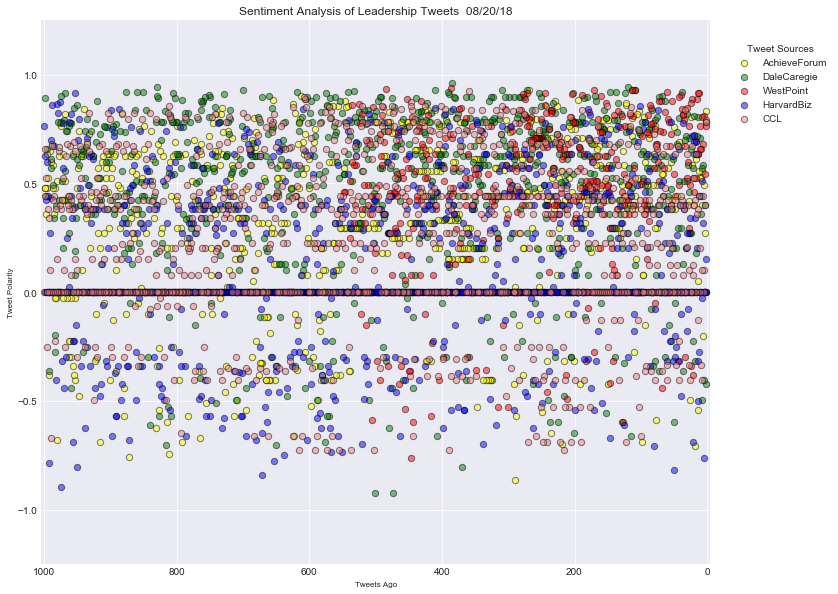

In [17]:
# 6.  Initialze the scatterplot 
import time
todaysdate = time.strftime("%m/%d/%y")

fix, ax  = plt.subplots(figsize =(12,10))

sns.set_style("darkgrid")

plt.ylim(-1.25,1.25)
plt.xlim(1005,-5)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel("Tweets Ago", fontsize=8)
plt.ylabel("Tweet Polarity", fontsize=8)
plt.title("Sentiment Analysis of Leadership Tweets  " + todaysdate, fontsize=12)
#("AchieveForum = af","DaleCarnegie = dc", "TLDG_WestPoint = wp", "HarvardBiz = hb "CCLdotORG = ccl")

plt.scatter(x_af, y_af, marker="o", s=40, facecolors="yellow", edgecolors="black", alpha=0.5, label='AchieveForum')
plt.scatter(x_dc, y_dc, marker="o", s=40, facecolors="green", edgecolors="black", alpha=0.5, label='DaleCaregie')
plt.scatter(x_wp, y_wp, marker="o", s=40, facecolors="red", edgecolors="black", alpha=0.5, label='WestPoint')
plt.scatter(x_hb, y_hb, marker="o", s=40, facecolors="blue", edgecolors="black", alpha=0.5, label='HarvardBiz')
plt.scatter(x_ccl, y_ccl, marker="o", s=40, facecolors="lightcoral", edgecolors="black", alpha=0.5, label="CCL")
plt.legend(title="Tweet Sources", fontsize=10, bbox_to_anchor=(1,1), loc=2, borderaxespad=2)

plt.savefig('./Plots_Folder/Twitter_Plots/tweets_scatterplot.png')

plt.show()

In [18]:
# 6.  Calculate the compound averages for tweet polarity

#AF
y_af = np.mean(results_list[0]["Compound"])
#x_af = results_list[0]["Text"]

#DC
y_dc = np.mean(results_list[1]["Compound"])
#x_dc = results_list[1]["Number"]

#WP
y_wp = np.mean(results_list[2]["Compound"])
#x_wp = results_list[2]["Number"]

#HB
y_hb = np.mean(results_list[3]["Compound"])
#x_hb = results_list[3]["Number"]

#CCL
y_ccl = np.mean(results_list[4]["Compound"])
#x_ccl = results_list[4]["Number"]

y_cities = [y_af, y_dc, y_wp, y_hb, y_ccl]
colors = ["yellow","green","red","blue","lightcoral"]
media_names = ["AF", "DC", "WP", "HB", "CCL"]

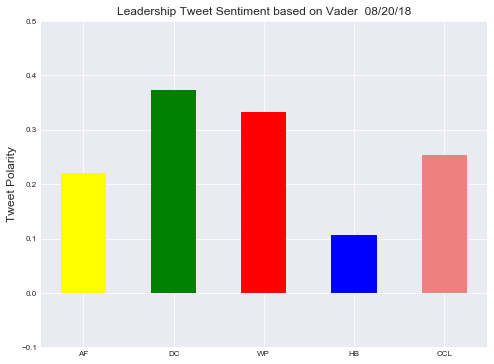

In [44]:
# 6.  Create the plot 
import time
todaysdate = time.strftime("%m/%d/%y")

fig, ax  = plt.subplots(figsize =(8,6))

sns.set_style("dark")
ax.grid(False)

plt.ylim(-.1,.5)
#plt.xlim(105,-5)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.ylabel("Tweet Polarity", fontsize=12)
plt.title("Leadership Tweet Sentiment based on Vader  " +  todaysdate, fontsize=12)

y = plt.bar(media_names, y_cities, color=colors, align="center", width=.5)

# Setting the grid
plt.grid(True)

plt.savefig('./Plots_Folder/Twitter_Plots/Leadership_Tweet_Sentiment_barchart.png')


plt.show()

In [45]:
################################################################################################################################

In [46]:
### Linear Regression Analysis on LDP Data

In [47]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import scipy.stats as stats
import numpy as np


In [48]:
#read csv file
df = pd.read_csv("clean_LDP_dataset.csv")
df

,Unnamed: 0,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,...,Trainer03RC,Trainer03FL,Trainer04BK,Trainer04RC,Trainer04FL,Trainer05BK,Trainer05RC,Trainer05FL,Program Code,Q15 - Topics
0,2,1/30/15 11:21,1/30/15 11:27,IP Address,208.0.118.3,NaN,336,True,6/19/17 19:54,R_30dvwf8u53maBHD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
1,3,1/30/15 11:21,1/30/15 11:27,IP Address,208.0.118.3,NaN,383,True,6/19/17 19:54,R_2XnsYU4IUfTwIZ7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
2,4,1/30/15 11:21,1/30/15 11:27,IP Address,208.0.118.3,NaN,379,True,6/19/17 19:54,R_1plIhVnhtEvVta3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,1/30/15 11:21,1/30/15 11:28,IP Address,208.0.118.3,NaN,462,True,6/19/17 19:54,R_3hxzKGqy7BHj5So,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
4,6,1/30/15 11:21,1/30/15 11:29,IP Address,208.0.118.3,NaN,499,True,6/19/17 19:54,R_2BksDDpAJJGaBWy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
5,7,1/30/15 11:21,1/30/15 11:29,IP Address,208.0.118.3,NaN,511,True,6/19/17 19:54,R_3EtnMMEcORQrdzf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
6,8,1/30/15 11:21,1/30/15 11:30,IP Address,208.0.118.3,NaN,550,True,6/19/17 19:54,R_5hwZuzSyNc52rV7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
7,9,1/30/15 11:21,1/30/15 11:31,IP Address,208.0.118.3,NaN,615,True,6/19/17 19:54,R_33jWkeW30s99PfB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
8,10,1/30/15 11:21,1/30/15 11:31,IP Address,208.0.118.3,NaN,650,True,6/19/17 19:54,R_3hcemBMr3m3g3IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
9,11,1/30/15 11:21,1/30/15 11:32,IP Address,208.0.118.3,NaN,682,True,6/19/17 19:54,R_5h9A8oYgwqtFuiB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown


In [49]:
#list all columns in dataframe
list(df)

['Unnamed: 0',
 'StartDate',
 'EndDate',
 'Status',
 'IPAddress',
 'Progress',
 'Duration (in seconds)',
 'Finished',
 'RecordedDate',
 'ResponseId',
 'ExternalReference',
 'LocationLatitude',
 'LocationLongitude',
 'DistributionChannel',
 'UserLanguage',
 'Q2_1',
 'Q3',
 'Q4',
 'Q5#1_1',
 'Q5#1_2',
 'Q5#1_3',
 'Q5#1_4',
 'Q5#1_5',
 'Q5#1_6',
 'Q5#1_7',
 'Q5#1_8',
 'Q5#1_9',
 'Q5#2_1',
 'Q5#2_2',
 'Q5#2_3',
 'Q5#2_4',
 'Q5#2_5',
 'Q5#2_6',
 'Q5#2_7',
 'Q5#2_8',
 'Q5#2_9',
 'Q6_1',
 'Q6_2',
 'Q7',
 'Q8',
 'Q9_1',
 'Q9_2',
 'Q11_2',
 'Q11_3',
 'Q11_4',
 'Q12_2',
 'Q12_3',
 'Q12_4',
 'Q13_2',
 'Q13_3',
 'Q13_4',
 'Q14_2',
 'Q14_3',
 'Q14_4',
 'Q24_2',
 'Q24_3',
 'Q24_4',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19_13',
 'Q19_14',
 'Q19_15',
 'Q19_16',
 'Q19_17',
 'Q20',
 'Q21',
 'ClassId',
 'Title',
 'StartDate.1',
 'Campus',
 'Location',
 'Trainer01',
 'Trainer02',
 'Trainer03',
 'ProgramCoordinator01',
 'OrgName',
 'ESI_Key',
 'Hotel',
 'RecipientFirstName',
 'RecipientLastName',
 'Trainer04'

In [50]:
#only include the column that matters from the dataframe
df = df[['Q2_1','Q5#1_1','Q5#1_2','Q5#1_3','Q5#1_4','Q5#1_5','Q5#1_6','Q5#1_7','Q5#1_8','Q5#1_9','Q5#2_1','Q5#2_2',
         'Q5#2_3','Q5#2_4','Q5#2_5','Q5#2_6','Q5#2_7','Q5#2_8','Q5#2_9','Q6_1','Q6_2','Q9_1','Q9_2','Q11_2','Q11_3',
         'Q11_4','Q12_2','Q12_3','Q12_4','Q13_2','Q13_3','Q13_4']]
df.head()

,Q2_1,Q5#1_1,Q5#1_2,Q5#1_3,Q5#1_4,Q5#1_5,Q5#1_6,Q5#1_7,Q5#1_8,Q5#1_9,...,Q9_2,Q11_2,Q11_3,Q11_4,Q12_2,Q12_3,Q12_4,Q13_2,Q13_3,Q13_4
0,4.0,4.0,5.0,4.0,4.0,4.0,3.0,4.0,3.0,5.0,...,5.0,4.0,4.0,4.0,4.0,5.0,3.0,NaN,NaN,NaN
1,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN
2,5.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,...,5.0,4.0,5.0,5.0,4.0,5.0,5.0,NaN,NaN,NaN
3,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN
4,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN


In [51]:
#make sure all columns are type float
df.dtypes

Q2_1      float64
Q5#1_1    float64
Q5#1_2    float64
Q5#1_3    float64
Q5#1_4    float64
Q5#1_5    float64
Q5#1_6    float64
Q5#1_7    float64
Q5#1_8    float64
Q5#1_9    float64
Q5#2_1    float64
Q5#2_2    float64
Q5#2_3    float64
Q5#2_4    float64
Q5#2_5    float64
Q5#2_6    float64
Q5#2_7    float64
Q5#2_8    float64
Q5#2_9    float64
Q6_1      float64
Q6_2      float64
Q9_1      float64
Q9_2      float64
Q11_2     float64
Q11_3     float64
Q11_4     float64
Q12_2     float64
Q12_3     float64
Q12_4     float64
Q13_2     float64
Q13_3     float64
Q13_4     float64
dtype: object

In [52]:
#create a list of column names
col_names = ['Q2_1',
            'Q5#1_1',
            'Q5#1_2',
            'Q5#1_3',
            'Q5#1_4',
            'Q5#1_5',
            'Q5#1_6',
            'Q5#1_7',
            'Q5#1_8',
            'Q5#1_9',
            'Q5#2_1',
            'Q5#2_2',
            'Q5#2_3',
            'Q5#2_4',
            'Q5#2_5',
            'Q5#2_6',
            'Q5#2_7',
            'Q5#2_8',
            'Q5#2_9',
            'Q6_1',
            'Q6_2',
            'Q9_1',
            'Q9_2',
            'Q11_2',
            'Q11_3',
            'Q11_4',
            'Q12_2',
            'Q12_3',
            'Q12_4',
            'Q13_2',
            'Q13_3',
            'Q13_4']
df.dtypes

Q2_1      float64
Q5#1_1    float64
Q5#1_2    float64
Q5#1_3    float64
Q5#1_4    float64
Q5#1_5    float64
Q5#1_6    float64
Q5#1_7    float64
Q5#1_8    float64
Q5#1_9    float64
Q5#2_1    float64
Q5#2_2    float64
Q5#2_3    float64
Q5#2_4    float64
Q5#2_5    float64
Q5#2_6    float64
Q5#2_7    float64
Q5#2_8    float64
Q5#2_9    float64
Q6_1      float64
Q6_2      float64
Q9_1      float64
Q9_2      float64
Q11_2     float64
Q11_3     float64
Q11_4     float64
Q12_2     float64
Q12_3     float64
Q12_4     float64
Q13_2     float64
Q13_3     float64
Q13_4     float64
dtype: object

In [53]:
#drop the rows with Nan
df = df.dropna()
df.head()

,Q2_1,Q5#1_1,Q5#1_2,Q5#1_3,Q5#1_4,Q5#1_5,Q5#1_6,Q5#1_7,Q5#1_8,Q5#1_9,...,Q9_2,Q11_2,Q11_3,Q11_4,Q12_2,Q12_3,Q12_4,Q13_2,Q13_3,Q13_4
42,5.0,4.0,5.0,5.0,4.0,5.0,5.0,3.0,5.0,4.0,...,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0
44,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
45,5.0,3.0,5.0,5.0,4.0,4.0,5.0,3.0,5.0,4.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0
46,4.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,4.0,...,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
47,5.0,3.0,5.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,...,5.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0


r-squared = 0.1393049473105266


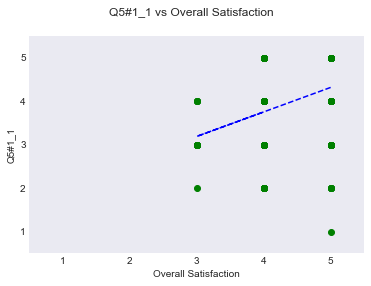

r-squared = 0.11400028673971767


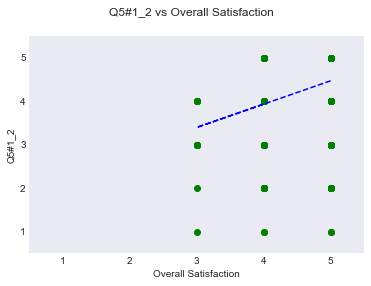

r-squared = 0.08060306156920809


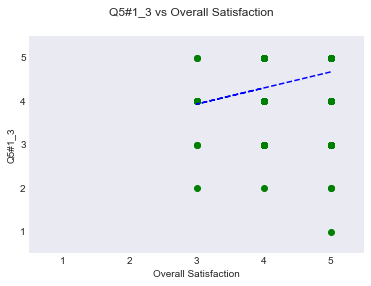

r-squared = 0.13180035417629443


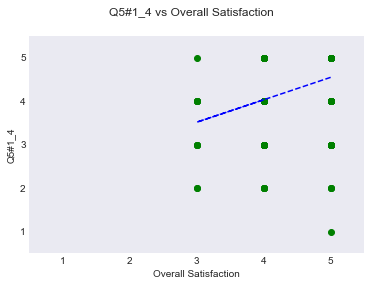

r-squared = 0.13357314014222368


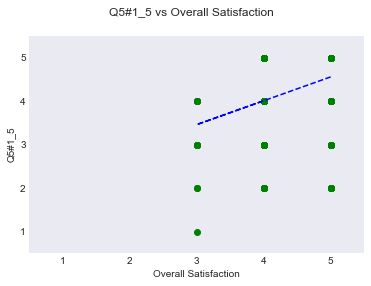

r-squared = 0.06741371379720039


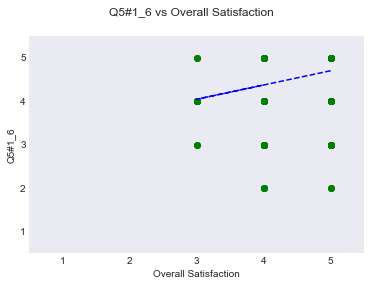

r-squared = 0.13694321177454305


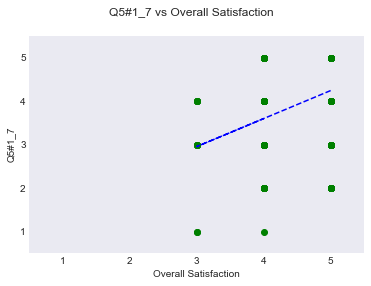

r-squared = 0.1314308716737924


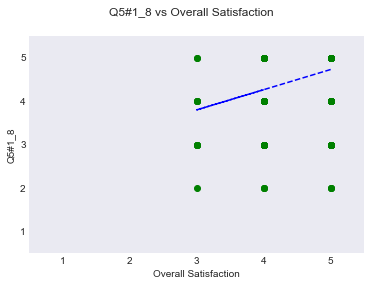

r-squared = 0.13094879487014655


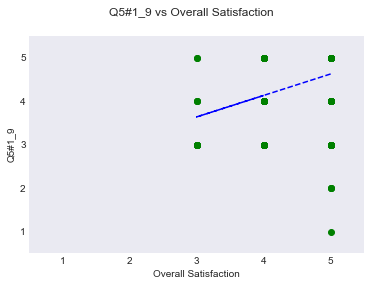

r-squared = 0.08615476932379901


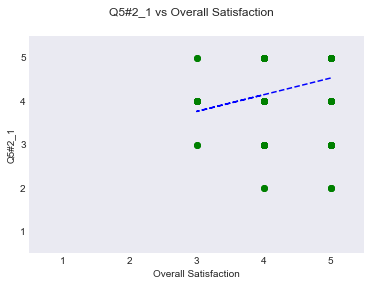

r-squared = 0.09605800776020491


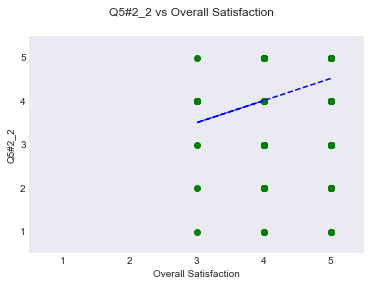

r-squared = 0.056146396976772886


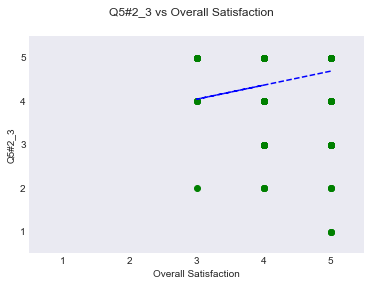

r-squared = 0.06498346645081145


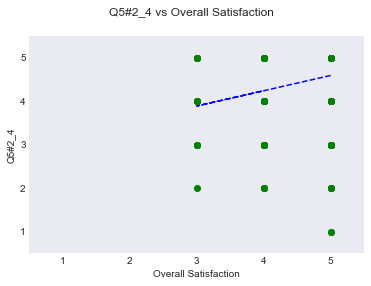

r-squared = 0.10620263126104326


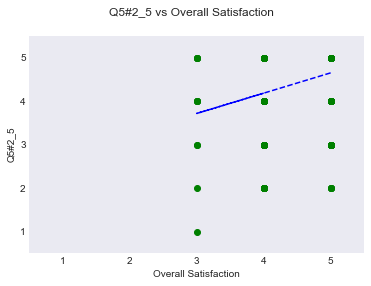

r-squared = 0.05739634689888148


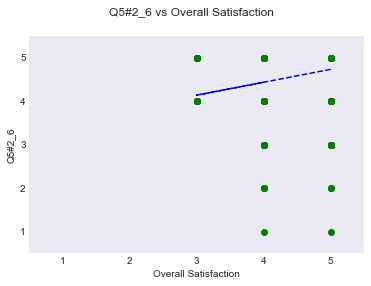

r-squared = 0.07944682393705976


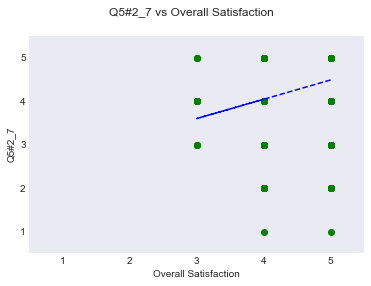

r-squared = 0.09456256732570271


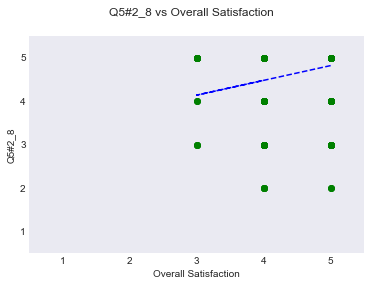

r-squared = 0.11031311823503426


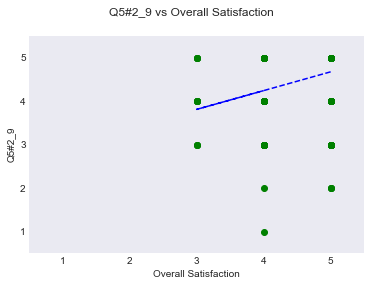

r-squared = 0.249390356219876


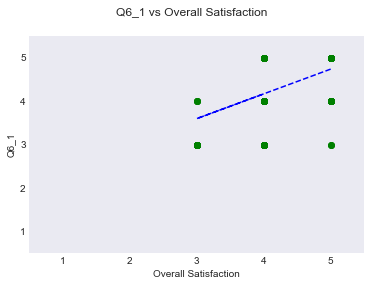

r-squared = 0.15723760686440574


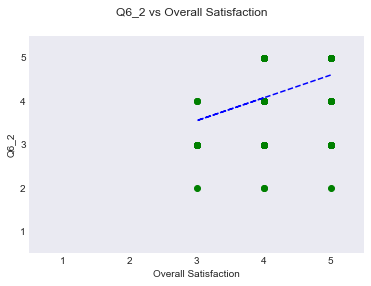

r-squared = 0.28113893520133104


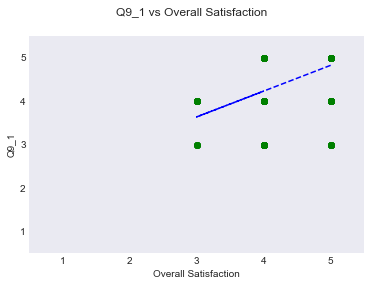

r-squared = 0.2473804658180771


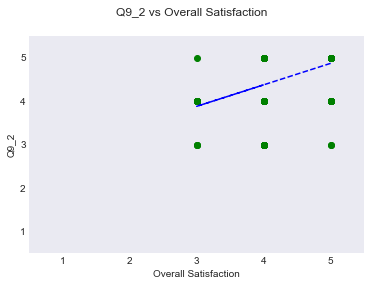

r-squared = 0.18248703271115368


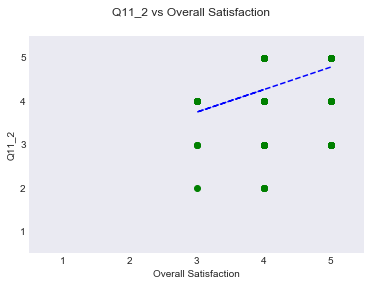

r-squared = 0.1263247007219406


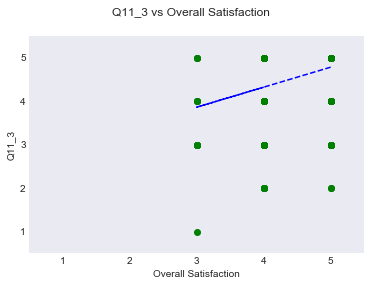

r-squared = 0.18442844590939134


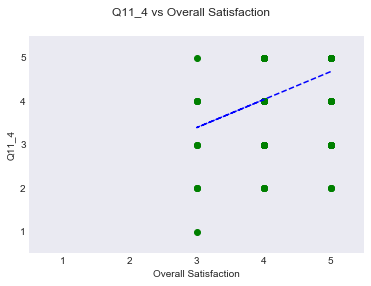

r-squared = 0.16824412992944288


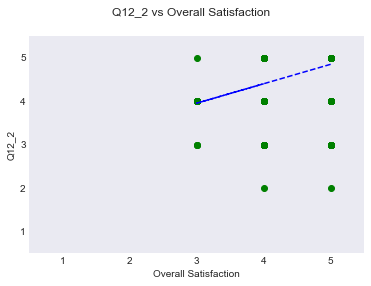

r-squared = 0.1343087018389621


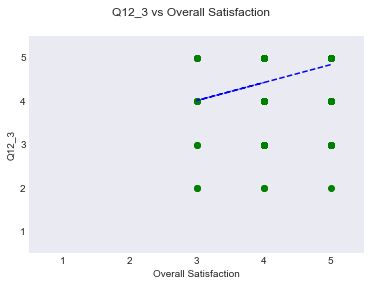

r-squared = 0.15303312943708208


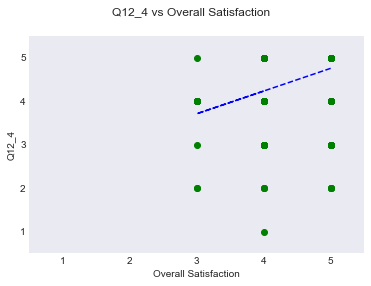

r-squared = 0.18433820749395097


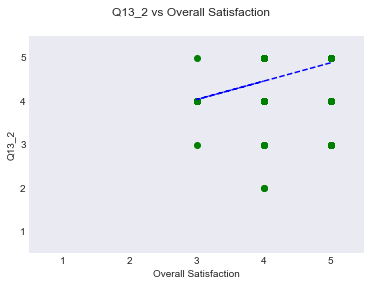

r-squared = 0.17808650739042406


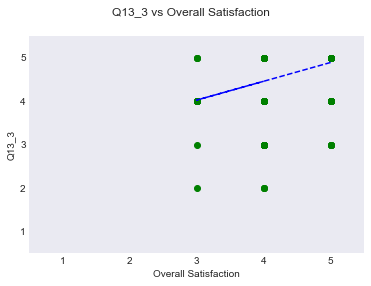

r-squared = 0.16102914430984436


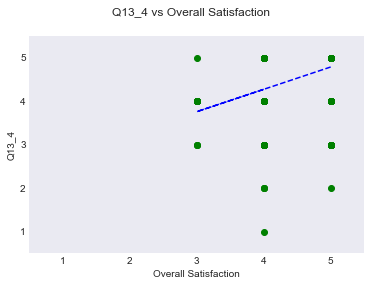

In [54]:
#to save all graphs in a single pdf file
from matplotlib.backends.backend_pdf import PdfPages
PP = PdfPages('./Plots_Folder/Regression_Plots/LDP Lin Regress Multiple.pdf')

#initialize index
num = 1

#start a list for r-squared values
r_squared = []

#do not include column 1
del col_names[0]

#start a dictionary of key=column names & value=r-squared
dicts = {}

#loop through all columns and rows and produce a linear regression graph
for dummy in col_names:
    points =(df.iloc[:,num]).round(2)
    x = df['Q2_1']
    slope, intercept, r, p, std_err = stats.linregress(x, points)
    fit = slope * x + intercept

    fig, ax = plt.subplots()
    fig.suptitle(f"{dummy} vs Overall Satisfaction")
    
    ax.set_xlim(0.5,5.5)
    ax.set_ylim(0.5,5.5)
    
    ax.set_xlabel("Overall Satisfaction")
    ax.set_ylabel(f"{dummy}")
                  
    ax.plot(x, points, 'go')
    ax.plot(x, fit, 'b--')
    r_sq = r**2    
    print(f"r-squared = {r_sq}")
    
    r_squared.append(r_sq)
    dicts[dummy] = r_sq 
    PP.savefig()
  
    plt.show()
    
    num += 1
    
    
PP.close()

In [55]:
#list the dictionary of column names and r-squared
print(dicts)

{'Q5#1_1': 0.1393049473105266, 'Q5#1_2': 0.11400028673971767, 'Q5#1_3': 0.08060306156920809, 'Q5#1_4': 0.13180035417629443, 'Q5#1_5': 0.13357314014222368, 'Q5#1_6': 0.06741371379720039, 'Q5#1_7': 0.13694321177454305, 'Q5#1_8': 0.1314308716737924, 'Q5#1_9': 0.13094879487014655, 'Q5#2_1': 0.08615476932379901, 'Q5#2_2': 0.09605800776020491, 'Q5#2_3': 0.056146396976772886, 'Q5#2_4': 0.06498346645081145, 'Q5#2_5': 0.10620263126104326, 'Q5#2_6': 0.05739634689888148, 'Q5#2_7': 0.07944682393705976, 'Q5#2_8': 0.09456256732570271, 'Q5#2_9': 0.11031311823503426, 'Q6_1': 0.249390356219876, 'Q6_2': 0.15723760686440574, 'Q9_1': 0.28113893520133104, 'Q9_2': 0.2473804658180771, 'Q11_2': 0.18248703271115368, 'Q11_3': 0.1263247007219406, 'Q11_4': 0.18442844590939134, 'Q12_2': 0.16824412992944288, 'Q12_3': 0.1343087018389621, 'Q12_4': 0.15303312943708208, 'Q13_2': 0.18433820749395097, 'Q13_3': 0.17808650739042406, 'Q13_4': 0.16102914430984436}


In [56]:
#print the column / question that has the highest r-squared value
max_col = [key for key, val in dicts.items() if val == max(r_squared)]
print(f"The question that affects Overall satisfaction the most is {max_col} which has an r-squared value of {max(r_squared)}")

The question that affects Overall satisfaction the most is ['Q9_1'] which has an r-squared value of 0.28113893520133104


In [57]:
#print the column / question that has the highest r-squared value
min_col = [key for key, val in dicts.items() if val == min(r_squared)]
print(f"The question that affects Overall satisfaction the least is {min_col} which has an r-squared value of {min(r_squared)}")

The question that affects Overall satisfaction the least is ['Q5#2_3'] which has an r-squared value of 0.056146396976772886


In [58]:
### Linear Regression Analysis on LOI Data

In [59]:
#read csv file
df = pd.read_csv("clean_LOI_EOP_DATA.csv")
df

,Unnamed: 0,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,...,Trainer03BK,Trainer03RC,Trainer03FL,Trainer04BK,Trainer04RC,Trainer04FL,Trainer05BK,Trainer05RC,Trainer05FL,Q19 - Topics
0,2,3/18/2015 12:45,3/18/2015 12:49,Imported,NaN,NaN,NaN,True,12/5/2016 9:56,R_0SBJxbMvb2atyWV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
1,3,3/18/2015 12:49,3/18/2015 12:53,Imported,NaN,NaN,NaN,True,12/5/2016 9:56,R_0JrYsqae33GJ4k5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
2,4,3/18/2015 12:53,3/18/2015 12:56,Imported,NaN,NaN,NaN,True,12/5/2016 9:56,R_37PQMD5fPaD6ubz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
3,5,3/18/2015 12:56,3/18/2015 13:00,Imported,NaN,NaN,NaN,True,12/5/2016 9:56,R_elY4rSfpu7vfmYd,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
4,6,3/18/2015 13:00,3/18/2015 13:03,Imported,NaN,NaN,NaN,True,12/5/2016 9:56,R_8B9XFJKSiT6Yzo9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
5,7,3/23/2015 14:38,3/23/2015 14:42,Imported,NaN,NaN,NaN,True,12/5/2016 9:56,R_eKHkPxensFcRUK9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
6,8,3/23/2015 14:42,3/23/2015 14:47,Imported,NaN,NaN,NaN,True,12/5/2016 9:56,R_2rjR3nSAGMp0Yv3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
7,9,3/23/2015 14:47,3/23/2015 14:55,Imported,NaN,NaN,NaN,True,12/5/2016 9:56,R_38Epz1uDD1n5BqZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
8,10,3/23/2015 14:56,3/23/2015 14:59,Imported,NaN,NaN,NaN,True,12/5/2016 9:56,R_1NEam7XshsQMrn7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown
9,11,3/23/2015 14:59,3/23/2015 15:12,Imported,NaN,NaN,NaN,True,12/5/2016 9:56,R_dpBO6Hnlb8Gbozz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown


In [60]:
#list all columns in dataframe
list(df)

['Unnamed: 0',
 'StartDate',
 'EndDate',
 'Status',
 'IPAddress',
 'Progress',
 'Duration (in seconds)',
 'Finished',
 'RecordedDate',
 'ResponseId',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'ExternalReference',
 'LocationLatitude',
 'LocationLongitude',
 'DistributionChannel',
 'UserLanguage',
 'Q3_1',
 'Q4',
 'Q5',
 'Q7_14',
 'Q7_15',
 'Q7_16',
 'Q7_17',
 'Q7_18',
 'Q7_19',
 'Q7_20',
 'Q7_21',
 'Q7_22',
 'Q7_23',
 'Q7_24',
 'Q8_14',
 'Q8_15',
 'Q8_16',
 'Q8_17',
 'Q8_18',
 'Q8_19',
 'Q8_20',
 'Q8_21',
 'Q8_22',
 'Q8_23',
 'Q8_24',
 'Q9_1',
 'Q9_2',
 'Q10',
 'Q11',
 'Q12',
 'Q13_1',
 'Q13_2',
 'Q15_2',
 'Q15_3',
 'Q15_4',
 'Q16_2',
 'Q16_3',
 'Q16_4',
 'Q17_2',
 'Q17_3',
 'Q17_4',
 'Q18_2',
 'Q18_3',
 'Q18_4',
 'Q36_2',
 'Q36_3',
 'Q36_4',
 'Q19',
 'Q20',
 'Q21',
 'Q22',
 'Q23_13',
 'Q24',
 'Q25_13',
 'Q25_14',
 'Q25_15',
 'Q25_16',
 'Q25_17',
 'Q26',
 'Q27',
 'ClassId',
 'Title',
 'StartDate.1',
 'Campus',
 'Location',
 'Trainer01',
 'Trainer02',
 'Trainer03',
 'Trainer04',
 '

In [61]:
#only include the column that matters from the dataframe
df = df[['Q3_1','Q9_1','Q9_2','Q13_1','Q13_2','Q16_2','Q16_3','Q16_4','Q17_2','Q17_3','Q17_4','Q23_13','Q25_13',
         'Q25_14','Q25_15','Q25_16','Q25_17']]

df

,Q3_1,Q9_1,Q9_2,Q13_1,Q13_2,Q16_2,Q16_3,Q16_4,Q17_2,Q17_3,Q17_4,Q23_13,Q25_13,Q25_14,Q25_15,Q25_16,Q25_17
0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,5.0,5.0,5.0,5.0,NaN,NaN
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,5.0
2,4.0,4.0,4.0,4.0,5.0,4.0,5.0,5.0,NaN,NaN,NaN,4.0,5.0,5.0,5.0,4.0,4.0
3,5.0,5.0,5.0,NaN,NaN,5.0,5.0,5.0,NaN,NaN,NaN,5.0,5.0,5.0,2.0,2.0,5.0
4,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,5.0,4.0,4.0,4.0,4.0,5.0
5,3.0,4.0,4.0,4.0,3.0,NaN,NaN,NaN,5.0,5.0,4.0,3.0,4.0,4.0,4.0,3.0,4.0
6,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
7,4.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0
8,3.0,4.0,3.0,5.0,5.0,NaN,NaN,NaN,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
9,4.0,5.0,4.0,5.0,4.0,NaN,NaN,NaN,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#make sure all columns are type float
df.dtypes

Q3_1      float64
Q9_1      float64
Q9_2      float64
Q13_1     float64
Q13_2     float64
Q16_2     float64
Q16_3     float64
Q16_4     float64
Q17_2     float64
Q17_3     float64
Q17_4     float64
Q23_13    float64
Q25_13    float64
Q25_14    float64
Q25_15    float64
Q25_16    float64
Q25_17    float64
dtype: object

In [63]:
#create a list of column names
col_names = ['Q3_1','Q9_1','Q9_2','Q13_1','Q13_2','Q16_2','Q16_3','Q16_4','Q17_2','Q17_3','Q17_4','Q23_13','Q25_13',
         'Q25_14','Q25_15','Q25_16','Q25_17']
df.dtypes

Q3_1      float64
Q9_1      float64
Q9_2      float64
Q13_1     float64
Q13_2     float64
Q16_2     float64
Q16_3     float64
Q16_4     float64
Q17_2     float64
Q17_3     float64
Q17_4     float64
Q23_13    float64
Q25_13    float64
Q25_14    float64
Q25_15    float64
Q25_16    float64
Q25_17    float64
dtype: object

In [64]:
#drop the rows with Nan
df = df.dropna()
df.head()

,Q3_1,Q9_1,Q9_2,Q13_1,Q13_2,Q16_2,Q16_3,Q16_4,Q17_2,Q17_3,Q17_4,Q23_13,Q25_13,Q25_14,Q25_15,Q25_16,Q25_17
495,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0
496,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0
497,4.0,4.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0
498,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
499,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0


r-squared = 0.2504115602707127


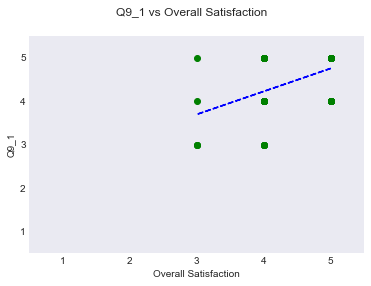

r-squared = 0.15731666601201832


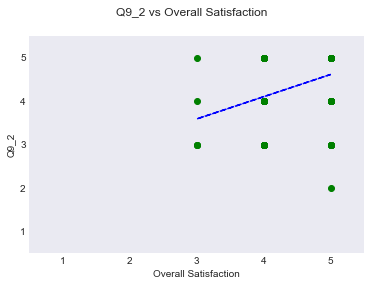

r-squared = 0.045852853528637265


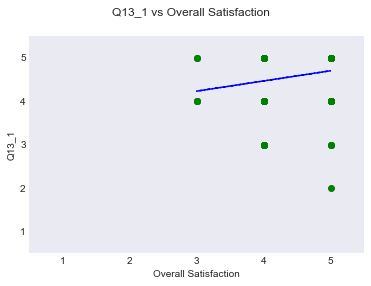

r-squared = 0.06574675324675289


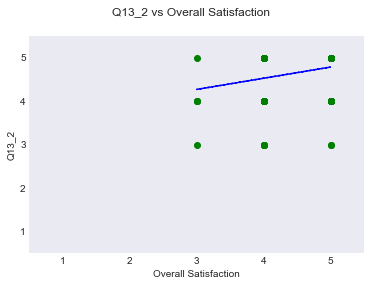

r-squared = 0.07812531756193664


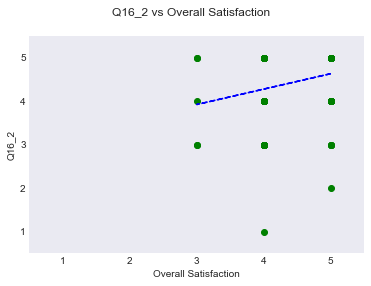

r-squared = 0.04410348046139933


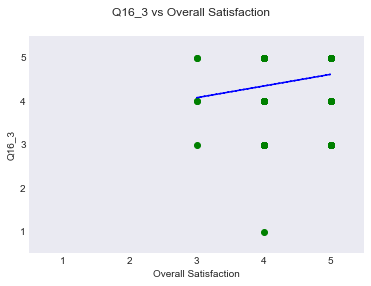

r-squared = 0.05686337740513816


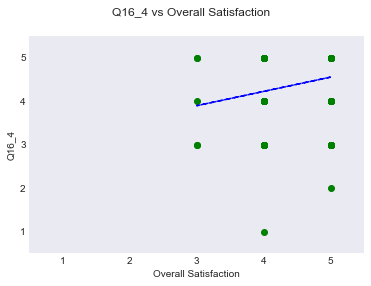

r-squared = 0.05871256094729499


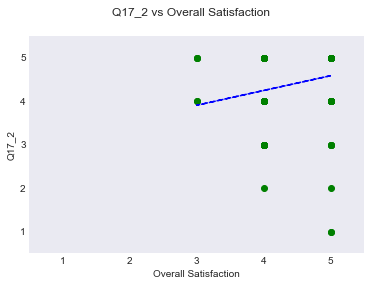

r-squared = 0.05540427314620836


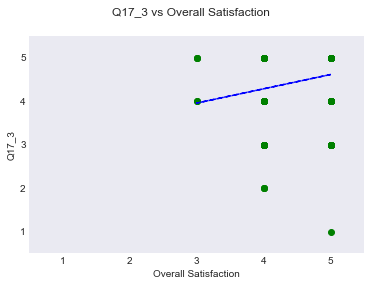

r-squared = 0.06800804828973785


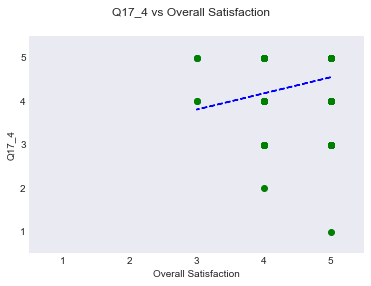

r-squared = 0.24727181477106633


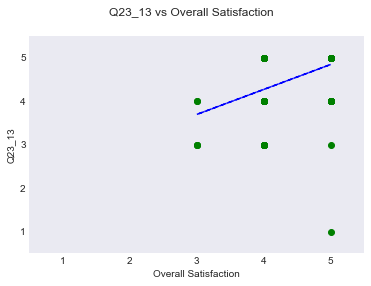

r-squared = 0.03579076170082592


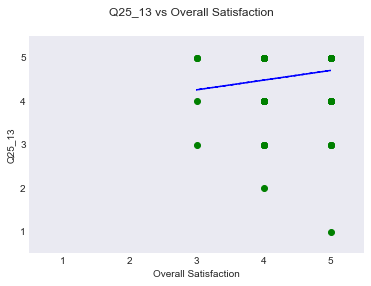

r-squared = 0.010878950094974962


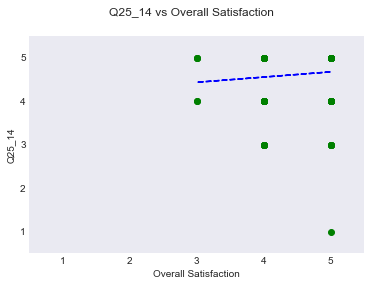

r-squared = 0.009814152601724371


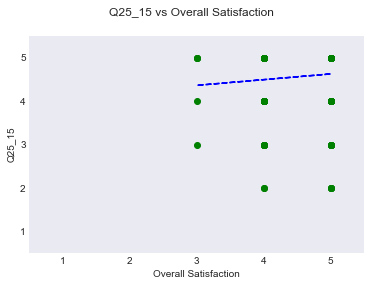

r-squared = 0.020407296639832907


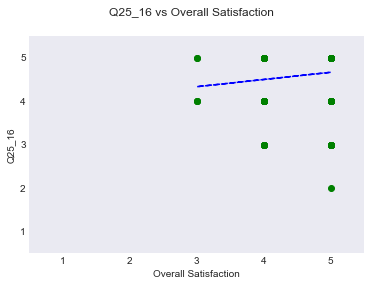

r-squared = 0.025608320251177343


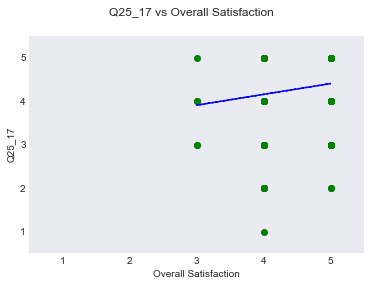

In [65]:
#to save all graphs in a single pdf file
from matplotlib.backends.backend_pdf import PdfPages
PP = PdfPages('./Plots_Folder/Regression_Plots/LOI Lin Regress.pdf')

#initialize index
num = 1

#start a list for r-squared values
r_squared = []

#do not include column 1
del col_names [0]

#start a dictionary of key=column names & value=r-squared
dicts = {}

#loop through all columns and rows and produce a linear regression graph
for dummy in col_names:
    points =(df.iloc[:,num]).round(2)
    x = df['Q3_1']
    slope, intercept, r, p, std_err = stats.linregress(x, points)
    fit = slope * x + intercept

    fig, ax = plt.subplots()
    fig.suptitle(f"{dummy} vs Overall Satisfaction")
    
    ax.set_xlim(0.5,5.5)
    ax.set_ylim(0.5,5.5)
    
    ax.set_xlabel("Overall Satisfaction")
    ax.set_ylabel(f"{dummy}")
                  
    ax.plot(x, points, 'go')
    ax.plot(x, fit, 'b--')
    r_sq = r**2
    print(f"r-squared = {r_sq}")
    
    r_squared.append(r_sq)
    dicts[dummy] = r_sq
    PP.savefig()
    plt.show()
    
    num += 1

PP.close()


In [66]:
#list the dictionary of column names and r-squared
print(dicts)

{'Q9_1': 0.2504115602707127, 'Q9_2': 0.15731666601201832, 'Q13_1': 0.045852853528637265, 'Q13_2': 0.06574675324675289, 'Q16_2': 0.07812531756193664, 'Q16_3': 0.04410348046139933, 'Q16_4': 0.05686337740513816, 'Q17_2': 0.05871256094729499, 'Q17_3': 0.05540427314620836, 'Q17_4': 0.06800804828973785, 'Q23_13': 0.24727181477106633, 'Q25_13': 0.03579076170082592, 'Q25_14': 0.010878950094974962, 'Q25_15': 0.009814152601724371, 'Q25_16': 0.020407296639832907, 'Q25_17': 0.025608320251177343}


In [67]:
#print the column / question that has the highest r-squared value
max_col = [key for key, val in dicts.items() if val == max(r_squared)]
print(f"The question that affects Overall satisfaction the most is {max_col} which has an r-squared value of {max(r_squared)}")

The question that affects Overall satisfaction the most is ['Q9_1'] which has an r-squared value of 0.2504115602707127


In [68]:
#print the column / question that has the highest r-squared value
min_col = [key for key, val in dicts.items() if val == min(r_squared)]
print(f"The question that affects Overall satisfaction the least is {min_col} which has an r-squared value of {min(r_squared)}")

The question that affects Overall satisfaction the least is ['Q25_15'] which has an r-squared value of 0.009814152601724371
